# Thank you 

for taking the time to view my notebook.  I hope you like it!  Please comment for any feedback you have.

I tried to make this notebook accessible to as much people as possible, which might mean that many comments will carry information you already know.  Also, if something didn't make sense to you (or I'm mistaken in some respect) please let me know!

---

<a name="toc"></a>
# Table of Contents

1.) [Imports](#imports)

2.) [Load Data](#load)

3.) [Introduction](#intro)

   - [Background](#background)

   - [Questionnaire](#questionnaire)

   - [Dataset](#dataset)
   
   - [Tracts](#tracts)
   
   - [County](#counties)
   
   - [States](#states)
   
4.) [General Focus](#general)

   - [Missing values - County](#nan_county)
   
   - [Missing values - Tract](#nan_tract)
   
   - [Nation as a Whole](#whole_nation)
   
   - [Correlation Maps](#gen_corr)

5.) [State Focus](#state)

   - [Population](#st_pop)
   
   - [Transportation](#st_trans)
   
   - [Commute time](#st_commute)
   
   - [Unemployment](#st_unemploy)
   
   - [Population and Representation](#race_pop)

6.) [Numeric Focus](#numeric)

   - [Income](#nu_income)

   - [Commute times](#nu_commute)
   
   - [Unemployment v. Poverty](#unemply_pov)
   
   - [Poverty v. Income](#pov_income)
   
   - [Poverty v. Carpool](#pov_carpool)
   
   - [MeanCommute v. Transit](#commute_trans) 

7.) [Focus on Fun!](#fun)

   - [Gender imbalance](#fun_gender)

   - [Selected Counties](#fun_selected)
   
8.) [Appendix](#appendix)

   - [A: Gender imbalance](#app_a)

9.) [Resources](#resources)

10.) [ACS Criticism](#criticism)

11.) [Further Work](#further)

---
<a name="imports"></a>
# [^](#toc) <u>Imports</u>

In [2]:
### Data handling imports
import pandas as pd
import numpy as np

### Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Image display
from IPython.display import Image

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

### Styling helpers

I found out about the color class from this [Stack Overflow question](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python) (thanks [Boubakr](https://stackoverflow.com/users/1770999/boubakr)!)

In [3]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a name="load"></a>
# [^](#toc) <u>Load data</u>

In [4]:
county = pd.read_csv("../../data/census/census_county.csv")
tract = pd.read_csv("../../data/census/census_tract.csv")

### Remove all rows in tract with zero population

A population is essential for Census data.  Having looked at the tract data already, I noticed there are a sizeable number of rows completely missing a population.

Let's delete these rows because they carry no information

In [4]:
before_N = len(tract)
tract = tract.drop(tract[tract.TotalPop == 0].index)
after_N = len(tract)

print("Number of rows removed with zero population: {}{}{}".format(color.BOLD, before_N - after_N, color.END))
del before_N, after_N

Number of rows removed with zero population: 690


---
<a name="intro"></a>
# [^](#toc) <u>Introduction</u>

<a name="background"></a>
### [^](#toc) Background

Every 10 years, the US governemt conducts a survey of the entire nation to understand the current distribution of the population.  Every citizen in the States receives a questionaire (see [questionaire below](#questionnaire)).  The idea of a Census has been since the county's founding with the first Census taken in 1790 under Secretary of State, Thomas Jefferson.

Around 1960, there began to be a greater demand for more data at regular intervals.  And after 45 years of discussion, planning, and allocation of funds, the US government expanded the Census Bureau to administer the American Community Survey (ACS).  However, there are a number of important differences in how the ACS and the 10-year Census are conducted.  The 10-year Census is required by everyone in the nation at the same time however the ACS is a rolling sample and sends out surveys to 295,000 addresses monthly (or 3.5 million per year). 

The purpose is the Census was originally to help update the Electoral College with a moving population.  The role the data takes as since expand, with knowledge of populations shifts and distributations helping the US government allocate $400 billion in funds each year

"This 1940 Census publicity photo shows a census worker in Fairbanks, Alaska.
The dog musher remains out of earshot to maintain confidentiality."
- nice Wikipedia caption


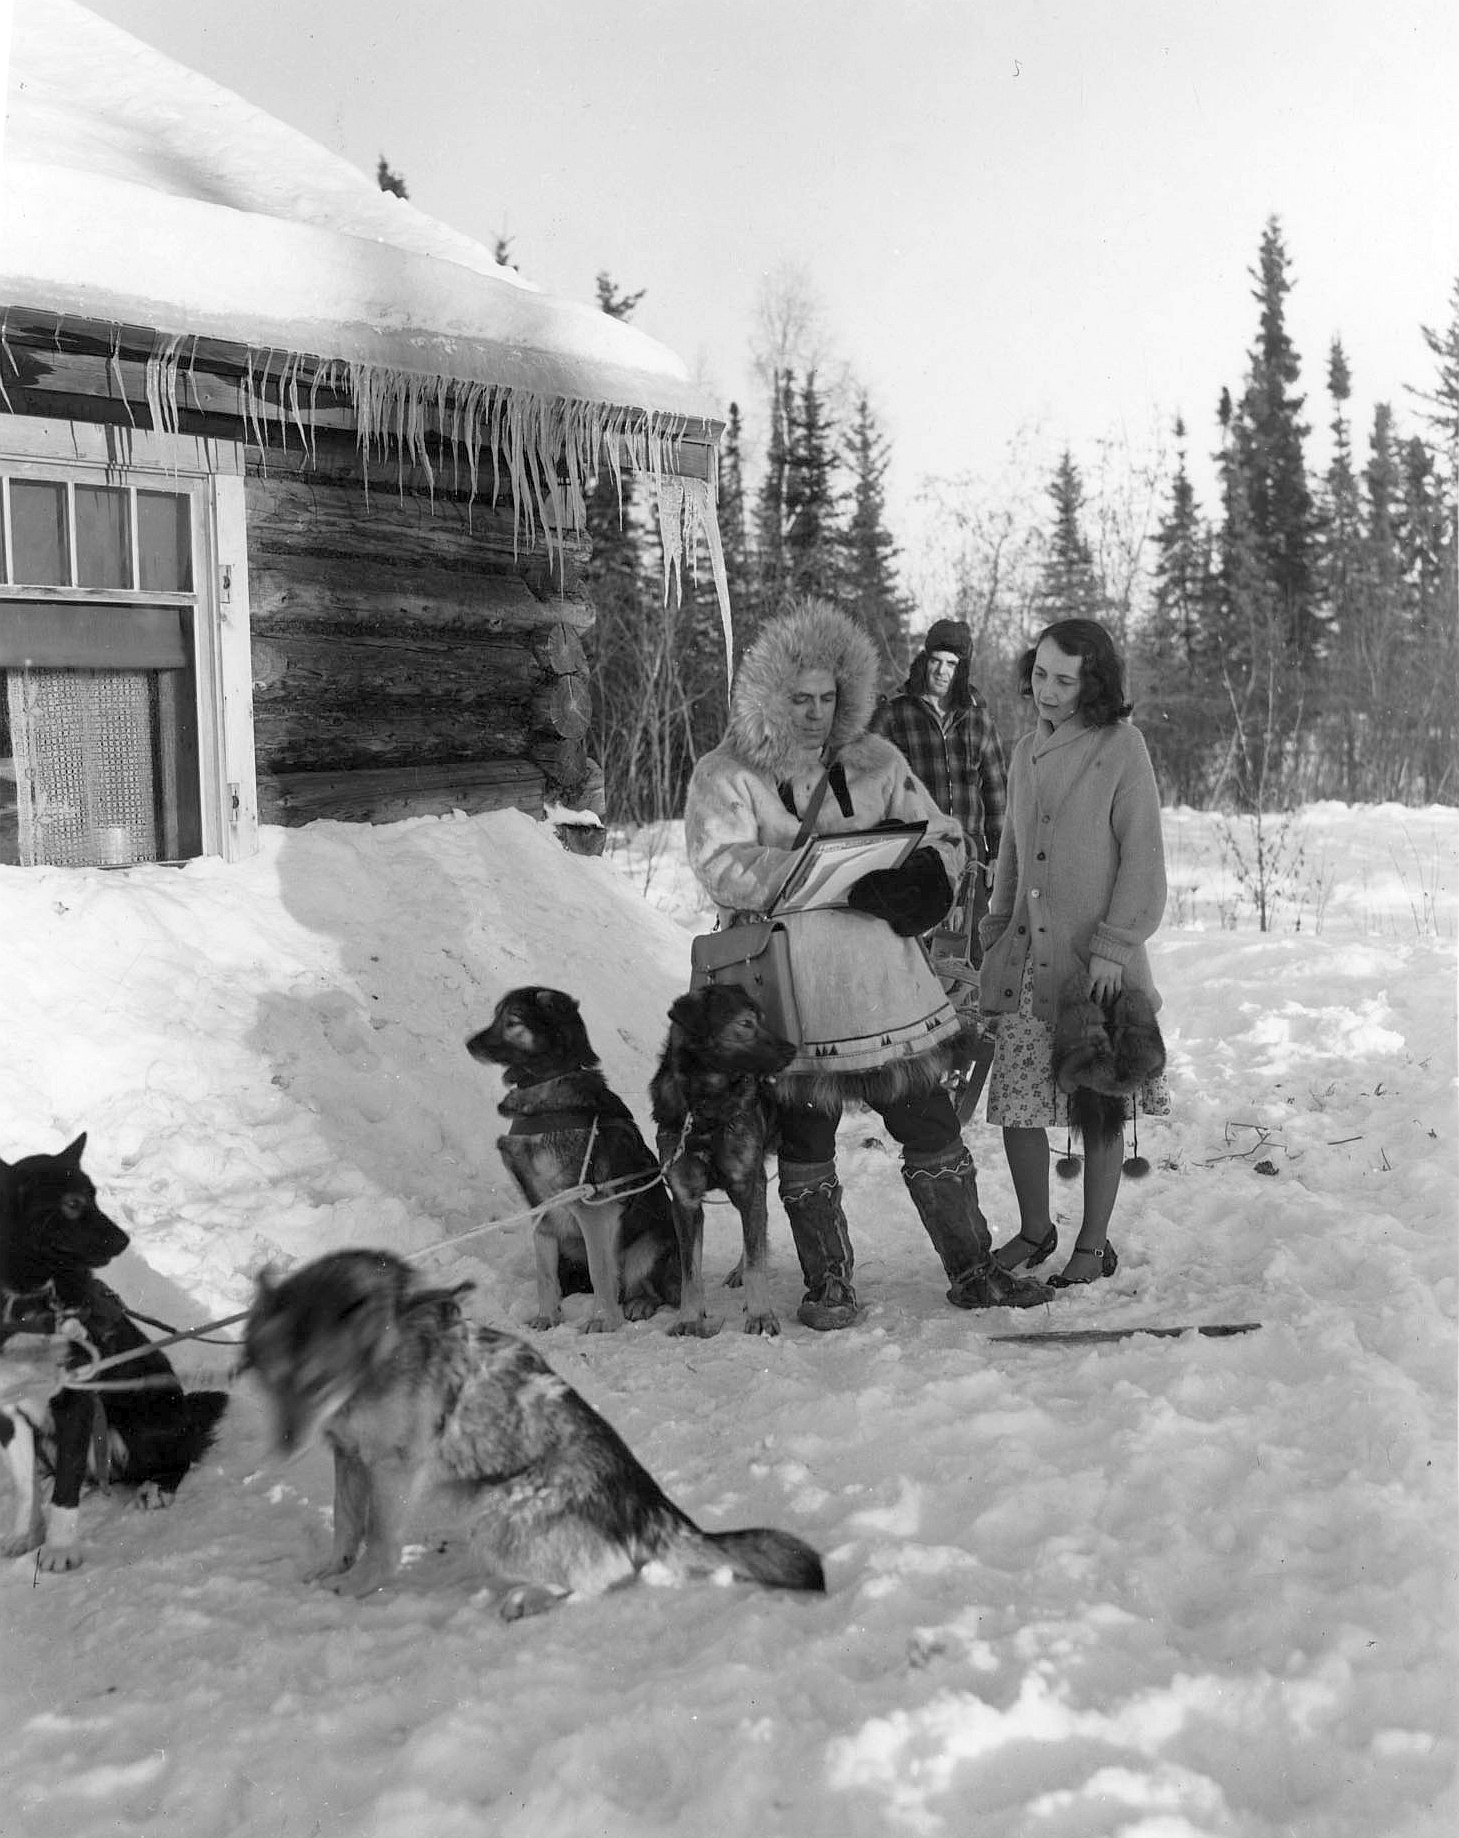

In [5]:
## source: https://www.flickr.com/photos/fdrlibrary/6872102290/
print("\"This 1940 Census publicity photo shows a census worker in Fairbanks, Alaska.")
print("The dog musher remains out of earshot to maintain confidentiality.\"")
print("- nice Wikipedia caption")
Image(filename='photos/census_taker.jpg', width=400, height=300)

<a name="questionnaire"></a>
### [^](#toc) Questionnaire

The actual American Community Survey is a very long meaning I can't comfortably fit it here.  Although, if you'd like to see it, you can find a [sample form](https://www2.census.gov/programs-surveys/acs/methodology/questionnaires/2018/quest18.pdf) on the US Census website.

To get a rough idea of the questions they ask, below is the 2010 Census form ([photo](https://www.census.gov/history/pdf/2010questionnaire.pdf))

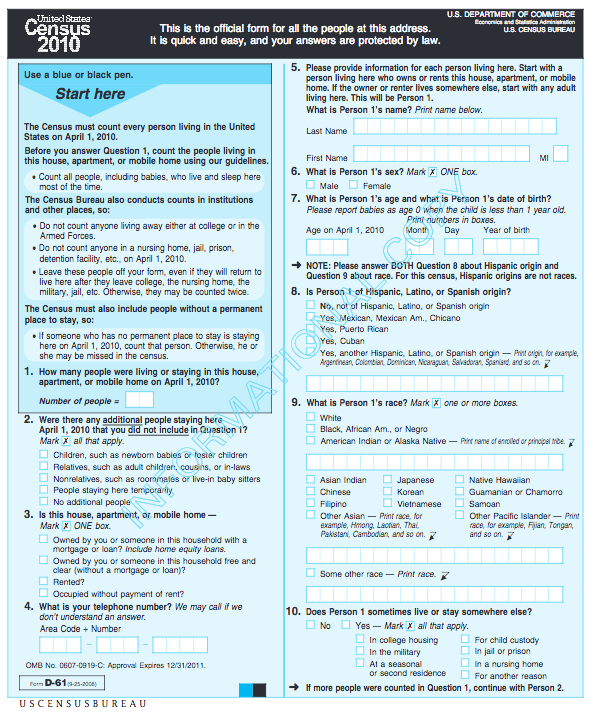

In [6]:
Image(filename='photos/census.png', width=800, height=600)

<a name="dataset"></a>
### [^](#toc) Dataset

The data comes from Kaggle user [Muon Neutrino](https://www.kaggle.com/muonneutrino) who took this data from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates.  I recommend just using [his data](https://www.kaggle.com/muonneutrino/us-census-demographic-data) as I found the American Fact Finder website slow and a bit hard to navigate.

The two tables have essentially the same information.  The data is collected in tracts which are subsections of a county while the county data is an accumulation of all the tract data.

In [7]:
print("Shape of county", county.shape)
print("Shape of tract", tract.shape)
print("Columns", county.columns)
county.head()

Shape of county (3220, 37)
Shape of tract (73311, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


CensusId    State   County  TotalPop    Men  Women  Hispanic  White  Black  \
0      1001  Alabama  Autauga     55221  26745  28476       2.6   75.8   18.5   
1      1003  Alabama  Baldwin    195121  95314  99807       4.5   83.1    9.5   
2      1005  Alabama  Barbour     26932  14497  12435       4.6   46.2   46.7   
3      1007  Alabama     Bibb     22604  12073  10531       2.2   74.5   21.4   
4      1009  Alabama   Blount     57710  28512  29198       8.6   87.9    1.5   

   Native  Asian  Pacific  Citizen   Income  IncomeErr  IncomePerCap  \
0     0.4    1.0      0.0    40725  51281.0     2391.0         24974   
1     0.6    0.7      0.0   147695  50254.0     1263.0         27317   
2     0.2    0.4      0.0    20714  32964.0     2973.0         16824   
3     0.4    0.1      0.0    17495  38678.0     3995.0         18431   
4     0.3    0.1      0.0    42345  45813.0     3141.0         20532   

   IncomePerCapErr  Poverty  ChildPoverty  Professional  Service  Office  \
0             1080     12.9          18.6          33.2     17.0    24.2   
1              711     13.4          19.2          33.1     17.7    27.1   
2              798     26.7          45.3          26.8     16.1    23.1   
3             1618     16.8          27.9          21.5     17.9    17.8   
4              708     16.7          27.2          28.5     14.1    23.9   

   Construction  Production  Drive  Carpool  Transit  Walk  OtherTransp  \
0           8.6        17.1   87.5      8.8      0.1   0.5          1.3   
1          10.8        11.2   84.7      8.8      0.1   1.0          1.4   
2          10.8        23.1   83.8     10.9      0.4   1.8          1.5   
3          19.0        23.7   83.2     13.5      0.5   0.6          1.5   
4          13.5        19.9   84.9     11.2      0.4   0.9          0.4   

   WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
0         1.8         26.5     23986         73.6        20.9           5.5   
1         3.9         26.4     85953         81.5        12.3           5.8   
2         1.6         24.1      8597         71.8        20.8           7.3   
3         0.7         28.8      8294         76.8        16.1           6.7   
4         2.3         34.9     22189         82.0        13.5           4.2   

   FamilyWork  Unemployment  
0         0.0           7.6  
1         0.4           7.5  
2         0.1          17.6  
3         0.4           8.3  
4         0.4           7.7

<a name="tracts"></a>
### [^](#toc) Tracts

The ACS is completed in Tracts.  One or many tracts make up a County however, one tract may not span multiple Counties.

To get a sense of scale, they can range from 3 to 53,812 people but are generally around 4,000 people. I realize that's a huge range, but hopefully the plots below will help!

The most populated Tract is: Harris, Texas with a population of: 53812 people
The least populated Tract is: Centre, Pennsylvania  with a population of: 3 people
The median number of people sampled in a Tract is: 4085


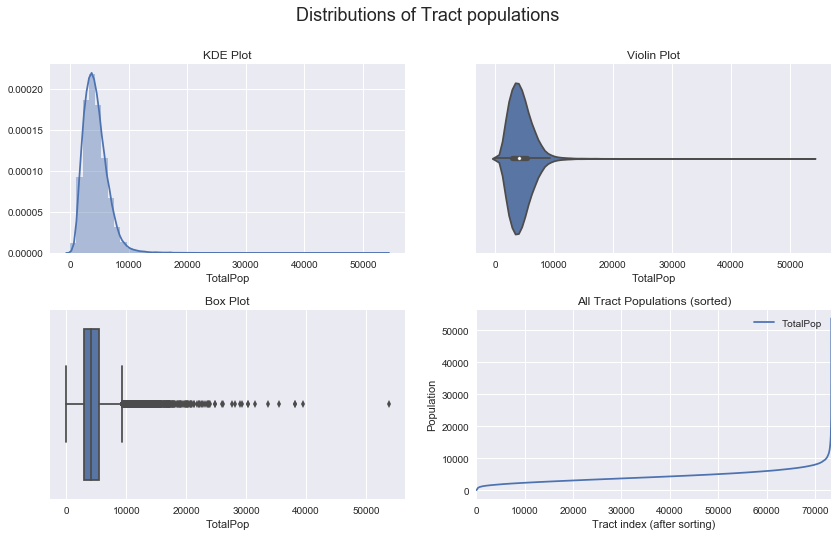

In [11]:
max_tract = tract.iloc[np.argmax(tract.TotalPop)][["CensusTract", "State", "County"]]
min_tract = tract.iloc[np.argmin(tract.TotalPop)][["CensusTract", "State", "County"]]

print("The most populated Tract is: {}{}, {}{}".format(color.BOLD, max_tract.County, max_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(tract.TotalPop), color.END))
print("The least populated Tract is: {}{}, {}{} ".format(color.BOLD, min_tract.County, min_tract.State, color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(tract.TotalPop), color.END))
print("The median number of people sampled in a Tract is: {}{}{}".format(color.BOLD, int(tract.TotalPop.median()), color.END))

### Plotting the different distributions
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of Tract populations", fontsize=18)

sns.distplot(tract.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(tract.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(tract.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
sorted_data = tract.TotalPop.sort_values().reset_index().drop("index", axis=1)
sorted_data.plot(
    kind="line",
    title="All Tract Populations (sorted)",
    ax=axarr[1][1]).set(xlabel="Tract index (after sorting)", ylabel="Population")
del sorted_data, min_tract, max_tract

<a name="counties"></a>
### [^](#toc) <u>Counties</u>

A County is a political subdivison of a State.  There are varying levels of influence each county can exert.  Alaska for instance has very low political power in its counties (technically they call them boroughs there) and operates mostly on the state level, however large cities like Los Angeles and New York are very strong on the county level.

For the purposes of this notebook it may help to think of Counties as just a collection of people that belong to a state.

The most populated County is: Los Angeles, California with a population of: 10038388 people
The least populated County is: Kalawao, Hawaii with a population of: 85 people
The median number of people living in a County is: 26035


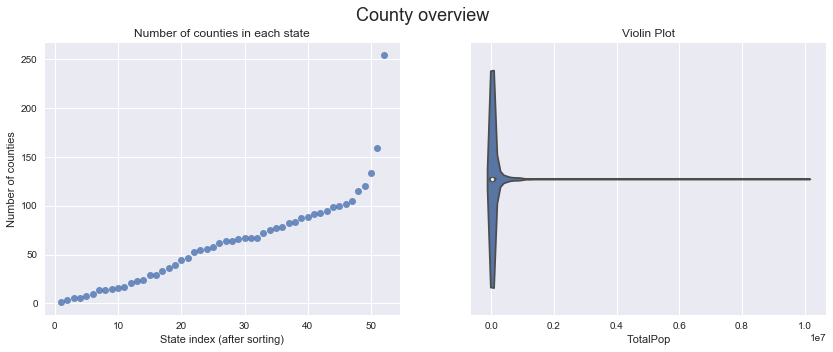

In [12]:
county_pop = county.groupby(["State", "County"]).TotalPop.sum()
print("The most populated County is: {}{}{}".format(color.BOLD, ", ".join(np.argmax(county_pop)[::-1]), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(county_pop), color.END))
print("The least populated County is: {}{}{}".format(color.BOLD, ", ".join(np.argmin(county_pop)[::-1]), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(county_pop), color.END))
print("The median number of people living in a County is: {}{}{}".format(color.BOLD, int(county_pop.median()), color.END))


### Plotting the different distributions
fig, axarr = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("County overview", fontsize=18)

counties = sorted(county.groupby("State").County.agg(len))
x = np.linspace(1, len(counties), len(counties))
counties = pd.DataFrame({"x":x, "Counties": counties})
(
    sns.regplot(x="x", y="Counties", data=counties, fit_reg=False, ax=axarr[0])
       .set(xlabel="State index (after sorting)", ylabel="Number of counties", title="Number of counties in each state")
)

sns.violinplot(county.TotalPop, ax=axarr[1]).set(title="Violin Plot")
del county_pop, counties, x

<a name="states"></a>
### [^](#toc) <u>States</u>

Okay, we all know what a State it, but let's see some visualizations anyways

The most populated State is: California with a population of: 38421464 people
The least populated State is: Wyoming with a population of: 579679 people
The median number of people living in a State is: 4168293


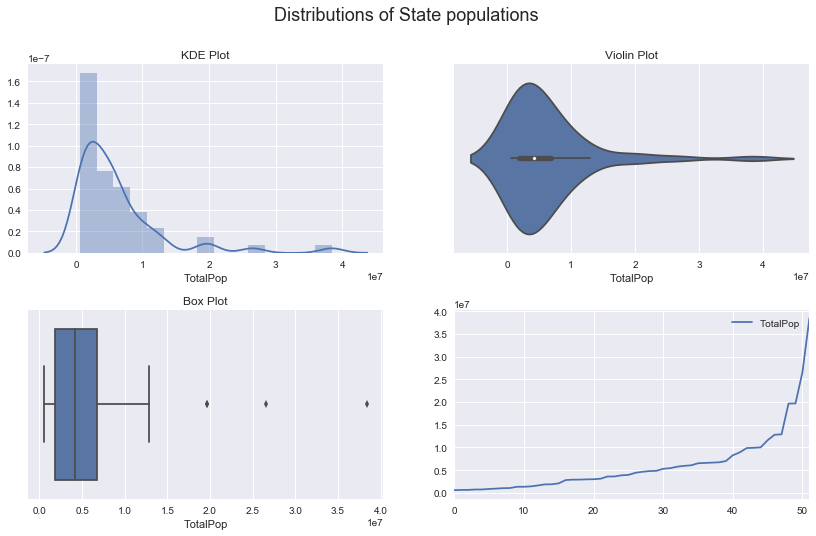

In [13]:
state_pop = county.groupby("State").TotalPop.sum()

print("The most populated State is: {}{}{}".format(color.BOLD, np.argmax(state_pop), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, max(state_pop), color.END))
print("The least populated State is: {}{}{}".format(color.BOLD, np.argmin(state_pop), color.END),
      "with a population of: {}{}{} people".format(color.BOLD, min(state_pop), color.END))
print("The median number of people living in a State is: {}{}{}".format(color.BOLD, int(state_pop.median()), color.END))

### Plotting the different distributions
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of State populations", fontsize=18)

sns.distplot(state_pop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(state_pop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(state_pop, ax=axarr[1][0]).set(title="Box Plot")
state_pop.sort_values().reset_index().drop("State", axis=1).plot(kind="line", ax=axarr[1][1])
del state_pop

<a name="general"></a>
# [^](#toc) <u>General</u>

Before we really start looking at the data, we need to see first if any preprocessing needs to be done.  This can take form in multiple ways such as incorrect data, removing outliers, formating errors, adding or removing columns.

I'd say universally, you want to look at the data to see if it's missing any values and drop or fill in those rows as necessary.  Let's look at both our dataframes for missing values

<a name="nan_county"></a>
### [^](#toc) <u>Missing values - County</u>

There doesn't seem to be anything serverely wrong with these missing values.  Both rows are only considering around 100 people and are complete for the most part.  Let's move on without filling in or dropping any rows.

In [14]:
missing_cols = [col for col in county.columns if any(county[col].isnull())]
print(county[missing_cols].isnull().sum())

### Look at rows with missing values
county[county.isnull().any(axis=1)]
del missing_cols

Income          1
IncomeErr       1
ChildPoverty    1
dtype: int64


<a name="nan_tract"></a>
### [^](#toc) <u>Missing values - Tract</u>

Tract data appears to have a lot more missing values than the County data, so let's look into this a bit more.

In [15]:
missing_cols = [col for col in tract.columns if any(tract[col].isnull())]
print(tract[missing_cols].isnull().sum())

### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()
del missing_cols

Income             410
IncomeErr          410
IncomePerCap        50
IncomePerCapErr     50
Poverty            145
ChildPoverty       428
Professional       117
Service            117
Office             117
Construction       117
Production         117
Drive              107
Carpool            107
Transit            107
Walk               107
OtherTransp        107
WorkAtHome         107
MeanCommute        259
PrivateWork        117
PublicWork         117
SelfEmployed       117
FamilyWork         117
Unemployment       112
dtype: int64


### A deeper look at missing values in Tract data

It appears most of the small tract samples have missing values.  This is definitely not conclusive, but it does offer a suggestion.  It's possible that individuals only put the number of people in their household and leave everything else blank.  If that is the case, Census workers may create their a new tract for people that refuse to answer questions.  There are many people like this in the United States as [this video](https://www.youtube.com/watch?v=bYwdOxOBwgM) shows.

Should more measures be taken with this data?  I'd argue no, the county dataset contains almost exactly the same information.  I'll use the county dataset mostly and look at the tract dataset as needed

In [16]:
tract.sort_values("TotalPop").head(20)

CensusTract           State        County  TotalPop  Men  Women  \
55761  42003980600    Pennsylvania     Allegheny         3    0      3   
73348  72037160100     Puerto Rico         Ceiba         3    3      0   
58137  42101980900    Pennsylvania  Philadelphia         4    4      0   
106     1015981901         Alabama       Calhoun         4    4      0   
55760  42003980500    Pennsylvania     Allegheny         4    4      0   
46492  36081021900        New York        Queens         4    0      4   
33953  26099982000        Michigan        Macomb         4    0      4   
27156  20209043804          Kansas     Wyandotte         4    4      0   
59219  45041980100  South Carolina      Florence         4    0      4   
45725  36061014300        New York      New York         5    0      5   
55766  42003981100    Pennsylvania     Allegheny         5    0      5   
7056    6037980009      California   Los Angeles         5    0      5   
29091  22071980000       Louisiana       Orleans         5    4      1   
60193  47009980100       Tennessee        Blount         5    3      2   
42006  34025804700      New Jersey      Monmouth         7    7      0   
44915  36047085200        New York         Kings         8    0      8   
45806  36061021703        New York      New York         8    0      8   
64692  48201980000           Texas        Harris         8    8      0   
46863  36081091800        New York        Queens         8    4      4   
16669  12087980100         Florida        Monroe         8    4      4   

       Hispanic  White  Black  Native  Asian  Pacific  Citizen  Income  \
55761       0.0  100.0    0.0     0.0    0.0      0.0        3     NaN   
73348      66.7   33.3    0.0     0.0    0.0      0.0        3     NaN   
58137       0.0  100.0    0.0     0.0    0.0      0.0        4     NaN   
106         0.0  100.0    0.0     0.0    0.0      0.0        4     NaN   
55760       0.0  100.0    0.0     0.0    0.0      0.0        4     NaN   
46492       0.0  100.0    0.0     0.0    0.0      0.0        4     NaN   
33953       0.0  100.0    0.0     0.0    0.0      0.0        0     NaN   
27156     100.0    0.0    0.0     0.0    0.0      0.0        4     NaN   
59219       0.0  100.0    0.0     0.0    0.0      0.0        4     NaN   
45725      40.0    0.0   40.0     0.0    0.0      0.0        4     NaN   
55766       0.0  100.0    0.0     0.0    0.0      0.0        5     NaN   
7056        0.0   20.0    0.0     0.0   80.0      0.0        4     NaN   
29091       0.0   40.0   20.0     0.0   40.0      0.0        4     NaN   
60193       0.0  100.0    0.0     0.0    0.0      0.0        5     NaN   
42006      28.6   42.9    0.0     0.0    0.0     14.3        7     NaN   
44915       0.0    0.0  100.0     0.0    0.0      0.0        8     NaN   
45806       0.0  100.0    0.0     0.0    0.0      0.0        8     NaN   
64692       0.0  100.0    0.0     0.0    0.0      0.0        8     NaN   
46863       0.0  100.0    0.0     0.0    0.0      0.0        8     NaN   
16669      25.0   25.0   50.0     0.0    0.0      0.0        6     NaN   

       IncomeErr  IncomePerCap  IncomePerCapErr  Poverty  ChildPoverty  \
55761        NaN           NaN              NaN      0.0           NaN   
73348        NaN           NaN              NaN      NaN           NaN   
58137        NaN           NaN              NaN      0.0           NaN   
106          NaN           NaN              NaN      0.0           NaN   
55760        NaN           NaN              NaN      0.0           NaN   
46492        NaN           NaN              NaN      0.0           NaN   
33953        NaN           NaN              NaN      0.0           NaN   
27156        NaN           NaN              NaN      0.0           NaN   
59219        NaN           NaN              NaN      0.0           NaN   
45725        NaN        2980.0          11980.0    100.0           NaN   
55766        NaN           NaN              NaN      0.0           NaN   
7056     

<a name="whole_nation"></a>
### [^](#toc) <u>Nation as a Whole</u>

I include both Tract and County data for the dual purpose of validating that they are equal

In [17]:
pd.DataFrame({
    "Population": [tract.TotalPop.sum(), county.TotalPop.sum()],
    "Women": [tract.Women.sum(), county.Women.sum()],
    "Men": [tract.Men.sum(), county.Men.sum()],
    "Citizens": [tract.Citizen.sum(), county.Citizen.sum()],
    "States": [len(tract.State.unique()), len(county.State.unique())],
    "Counties": [len(tract.groupby(["State", "County"])), len(county.groupby(["State", "County"]))],
    "Employed": [tract.Employed.sum(), county.Employed.sum()],
}, index=["Tract data", "County data"])

Citizens  Counties   Employed        Men  Population  States  \
Tract data   225190931      3220  146811129  157448140   320098094      52   
County data  225190931      3220  146811129  157448140   320098094      52   

                 Women  
Tract data   162649954  
County data  162649954

<a name="gen_corr"></a>
### [^](#toc) <u>Correlation Maps</u>

This looks at the relationship of every variable to every other variable.  There's a lot of information that can be gathered from these plots.

<strong>NOTE: Since there are so many columns, I split the map into three.</strong>

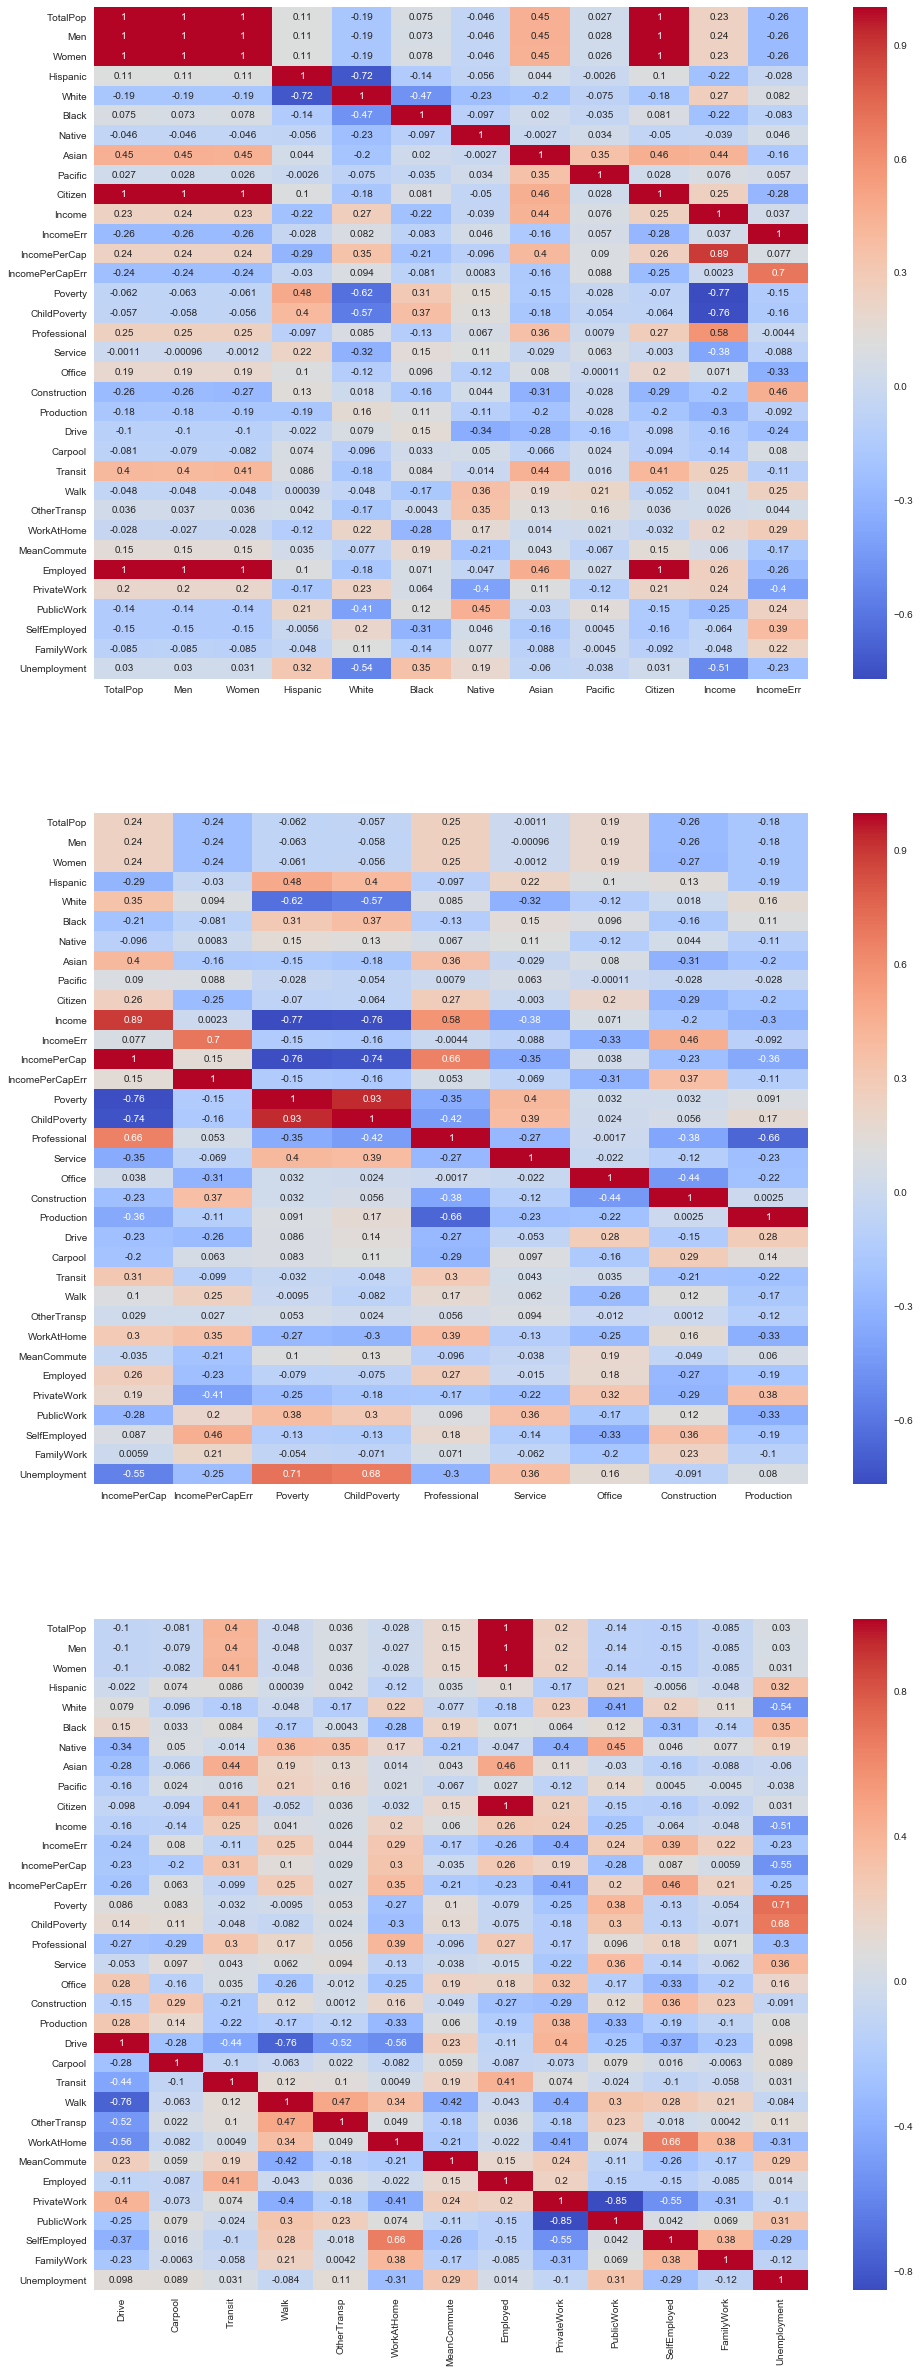

In [18]:
fig, axarr = plt.subplots(3, 1, figsize=(16, 42))
data = county.drop("CensusId", axis=1).corr()

sns.heatmap(data.head(12).transpose(), annot=True, cmap="coolwarm", ax=axarr[0])
sns.heatmap(data.iloc[12:21].transpose(), annot=True, cmap="coolwarm", ax=axarr[1])
sns.heatmap(data.tail(13).transpose(), annot=True, cmap="coolwarm", ax=axarr[2])
del data

---

<a name="state"></a>
# [^](#toc) <u>State</u>

### Can two states have the same county name?

The answer is a resounding, patriotic yes

In [22]:
(county
 .groupby("County")
 .apply(len)
 .sort_values(ascending=False)
 .where(dup_counties > 1)
 .dropna()
)

County
Washington    31.0
Jefferson     26.0
Franklin      25.0
Jackson       24.0
Lincoln       24.0
Madison       20.0
Clay          18.0
Union         18.0
Montgomery    18.0
Marion        17.0
Monroe        17.0
Wayne         16.0
Grant         15.0
Warren        14.0
Greene        14.0
Carroll       13.0
Polk          12.0
Johnson       12.0
Lake          12.0
Douglas       12.0
Lee           12.0
Adams         12.0
Clark         12.0
Marshall      12.0
Morgan        11.0
Crawford      11.0
Scott         11.0
Fayette       11.0
Lawrence      11.0
Calhoun       11.0
              ... 
Sumner         2.0
Harlan         2.0
Steele         2.0
Bradford       2.0
Surry          2.0
Barton         2.0
Barry          2.0
Boyd           2.0
Beaufort       2.0
Leon           2.0
Stanton        2.0
Brooks         2.0
Gloucester     2.0
Bath           2.0
Hale           2.0
Hampshire      2.0
Tipton         2.0
Trinity        2.0
Halifax        2.0
Bibb           2.0
Baldwin        2.0
Gilme

<a name="st_pop"></a>
### [^](#toc) <u>Population</u>

The results seem to line up nicely with Wikipedia's page ([link](https://en.wikipedia.org/wiki/County_statistics_of_the_United_States#Nationwide_population_extremes)), this is to be expected since the Wikipedia is using the 2016 estimate provided by the US Census bureau.

To others that may not know...
- Cooks county in Illnois is home to Chicago
- Harris, Texas contains Houston
- Maricopa, Arizona contains Phoenix

#### Fun facts!

- If the largest county, Los Angeles, were to become it's own State, it be the 8th most populous State.
- Kalawao County, Hawaii has no elected government and until 1969 it was used to quarantined people with leprosy

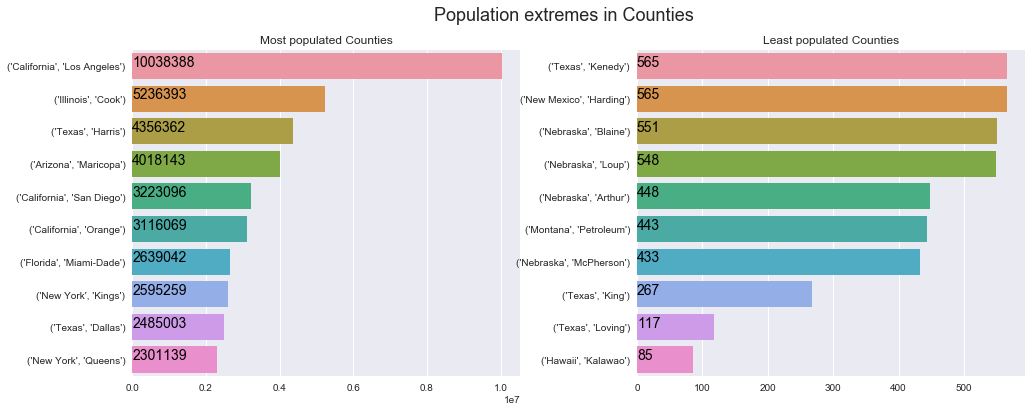

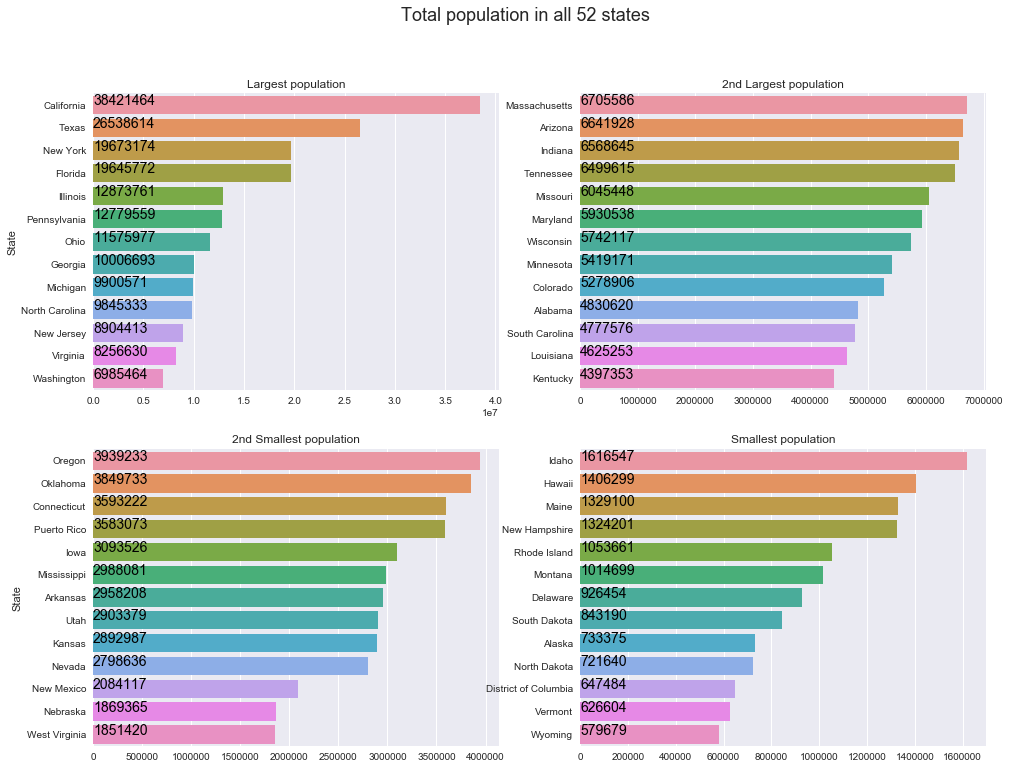

In [23]:
##### County Plots

fig, axarr = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Population extremes in Counties", fontsize=18)

county_pop = county.groupby(["State", "County"]).TotalPop.median().sort_values(ascending=False)

pretty_bar(county_pop.head(10), axarr[0], title="Most populated Counties")
pretty_bar(county_pop.tail(10), axarr[1], title="Least populated Counties")
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Total population in all 52 states", fontsize=18)

state_pops = county.groupby("State")["TotalPop"].sum().sort_values(ascending=False)

pretty_bar(state_pops.head(13), axarr[0][0], title="Largest population")
pretty_bar(state_pops.iloc[13:26], axarr[0][1], title="2nd Largest population", ylabel="")
pretty_bar(state_pops.iloc[26:39], axarr[1][0], title="2nd Smallest population")
pretty_bar(state_pops.tail(13), axarr[1][1], title="Smallest population", ylabel="")
del county_pop, state_pops

<a name="st_trans"></a>
### [^](#toc) <u>Transportation</u>

Some things to note:

- People don't drive in New York City, but they do take transit
- Clay, Georgia has the highest rate of carpooling
- Georgia is close to California in terms of carpooling
- Alaska likes to walk and use "OtherTransp" which I like to think as sea planes.  We will soon see that Alaska has the lowest mean commute time as well

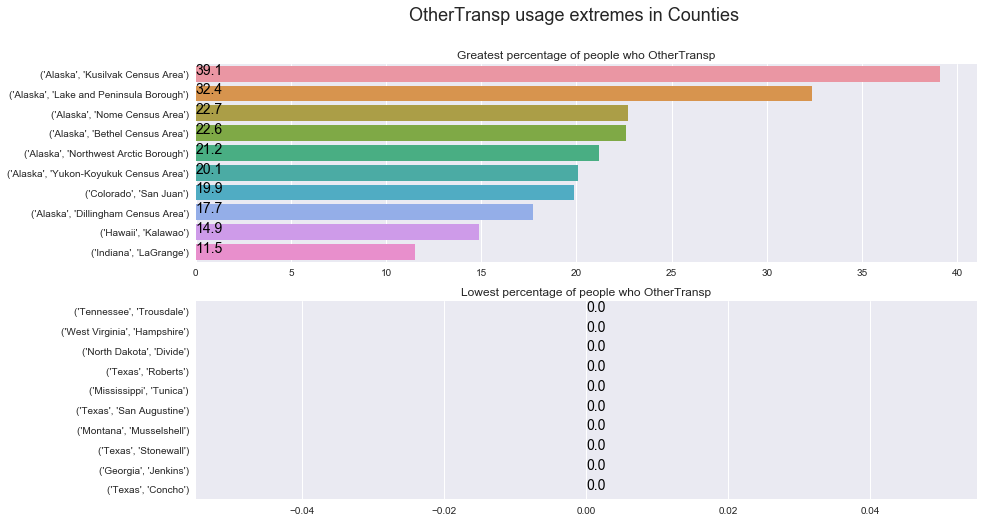

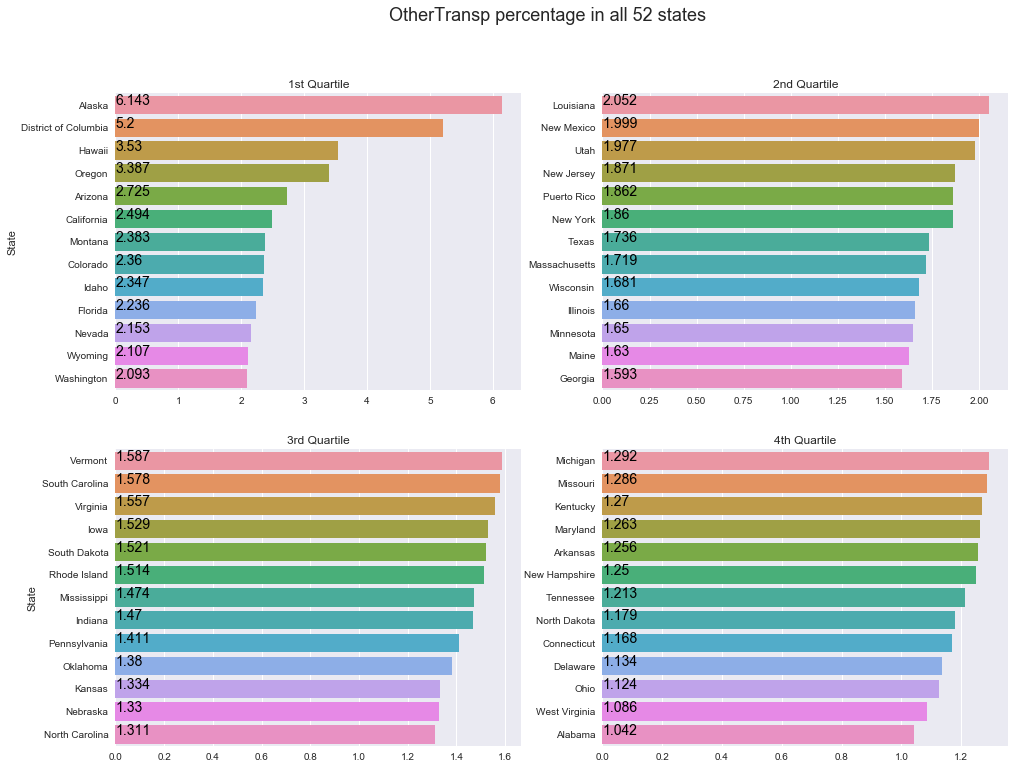

In [28]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

################  Configure me!!  ################

transportation = transportations[4]

##################################################

##### County Plots

fig, axarr = plt.subplots(2, 1, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)
fig.suptitle("{} usage extremes in Counties".format(transportation), fontsize=18)

trans_pops = county.groupby(["State", "County"])[transportation].median().sort_values(ascending=False)

pretty_bar(trans_pops.head(10), axarr[0], title="Greatest percentage of people who {}".format(transportation))
pretty_bar(trans_pops.tail(10), axarr[1], title="Lowest percentage of people who {}".format(transportation))
plt.show()

##### State Plots

county["trans"] = county.TotalPop * county[transportation]
plot_data = county.groupby("State")["trans"].sum() / county.groupby("State")["TotalPop"].sum()
plot_data = plot_data.sort_values(ascending=False)

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("{} percentage in all 52 states".format(transportation), fontsize=18)

trans_pops = county.groupby(["State"])["trans"].sum().sort_values(ascending=False)

pretty_bar(plot_data.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(plot_data.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(plot_data.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(plot_data.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

# Remove created column
county = county.drop("trans", axis=1)
del transportations, transportation, trans_pops

<a name="st_commute"></a>
### [^](#toc) <u>Commute time</u>

Wow!  Look how short Alaska's commute tends to be!

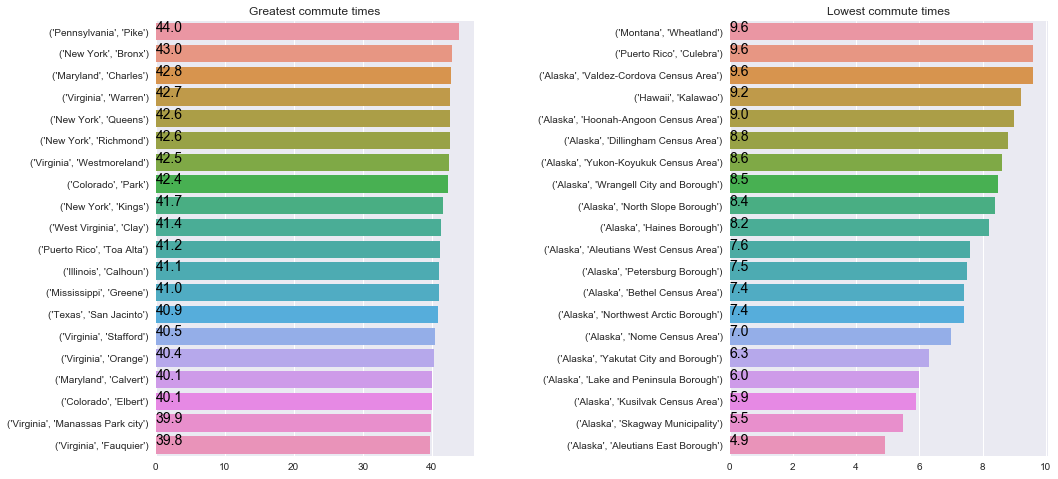

In [29]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(wspace=0.8)

commute = county.groupby(["State", "County"])["MeanCommute"].median().sort_values(ascending=False)

pretty_bar(commute.head(20), axarr[0], title="Greatest commute times")
pretty_bar(commute.tail(20), axarr[1], title="Lowest commute times")
del commute

<a name="st_unemploy"></a>
### [^](#toc) <u>Unemployment</u>

I never knew Puerto Rico is suffering so much.  We'll see later that Puerto Rico has the lowest Income and the highest rate of poverty too.

On the bright side, North Datoka has low unemployment because of fracking ([article link](http://fortune.com/north-dakota-fracking/)).

To refresh your understanding of Poe's law, see this [link](https://en.wikipedia.org/wiki/Poe%27s_law).

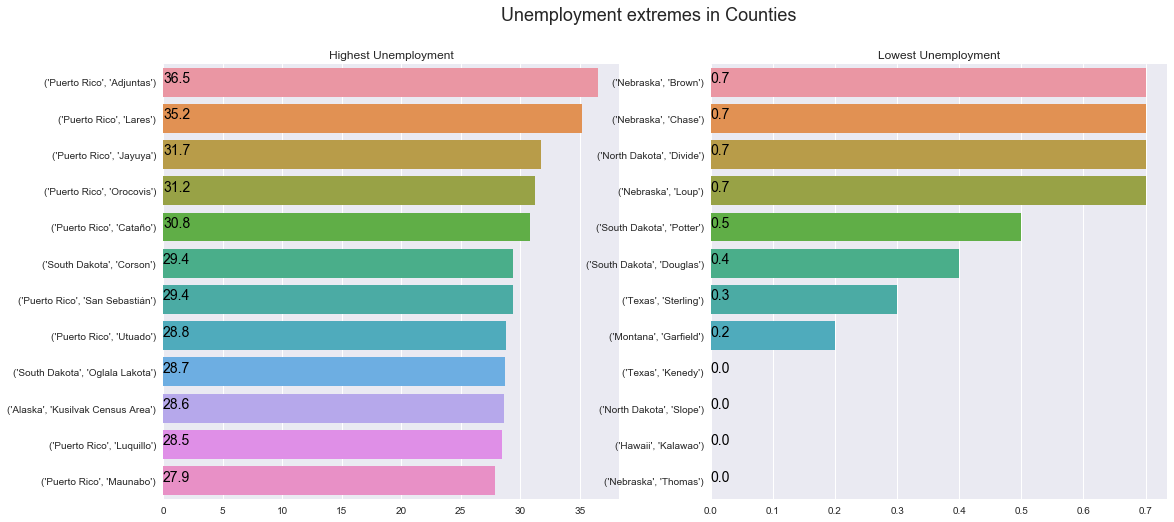

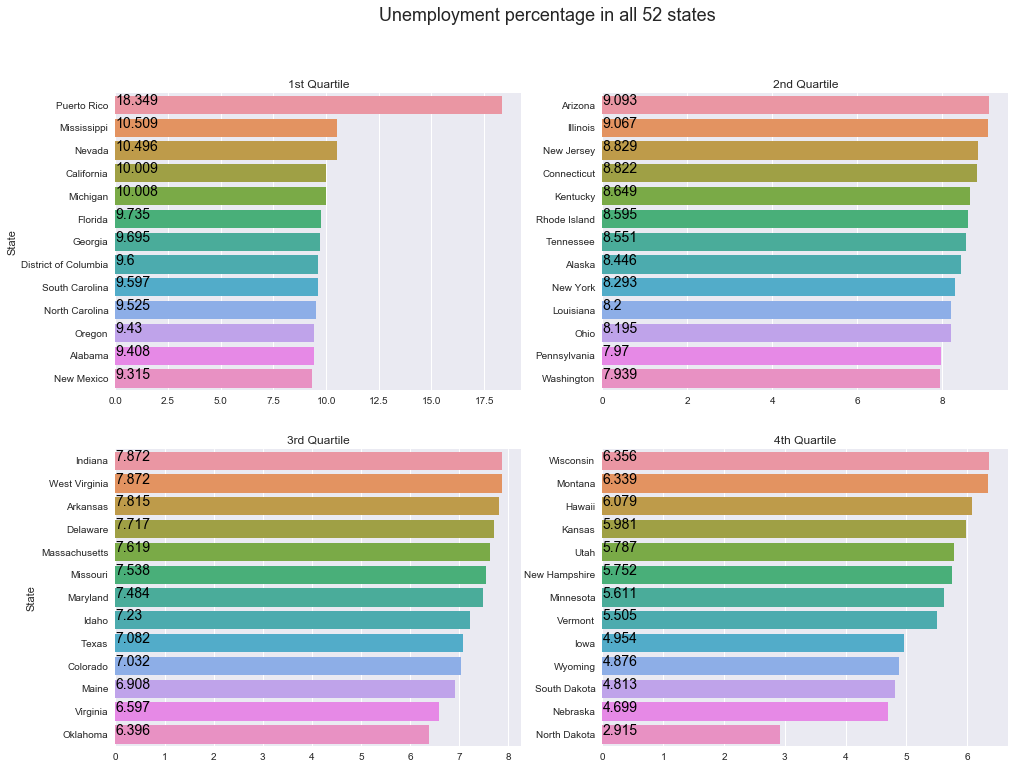

In [30]:
##### County Plots

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(hspace=0.8)
fig.suptitle("Unemployment extremes in Counties", fontsize=18)

unemployment = county.groupby(["State", "County"])["Unemployment"].median().sort_values(ascending=False)

pretty_bar(unemployment.head(12), axarr[0], title="Highest Unemployment")
pretty_bar(unemployment.tail(12), axarr[1], title="Lowest Unemployment")
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Unemployment percentage in all 52 states", fontsize=18)

county["Tot_Unemployment"] = county.Unemployment * county.TotalPop
unemployment = county.groupby("State").Tot_Unemployment.sum() / county.groupby("State").TotalPop.sum()
unemployment = unemployment.sort_values(ascending=False)

pretty_bar(unemployment.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(unemployment.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(unemployment.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(unemployment.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

# Remove created column
county = county.drop("Tot_Unemployment", axis=1)
del unemployment

### Income in Counties

As we saw above, Puerto Rico has the highest rate of Unemployment, so it is not too much of a surprise to see it's counties be some of the poorest in the nation.

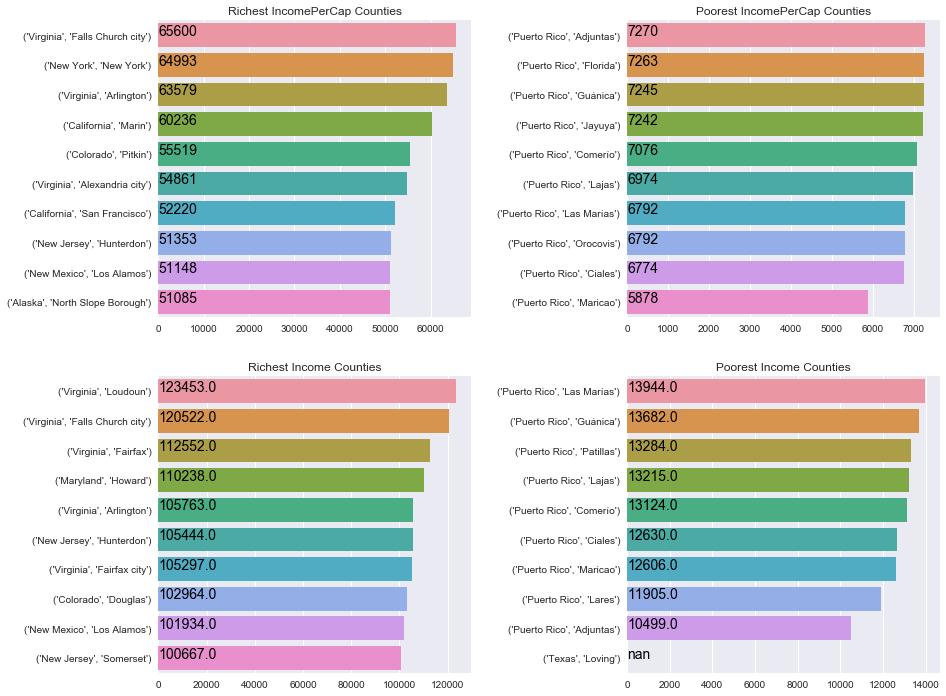

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

county_income_per_cap = county.groupby(["State", "County"])["IncomePerCap"].median().sort_values(ascending=False)
county_income = county.groupby(["State", "County"])["Income"].median().sort_values(ascending=False)

pretty_bar(county_income_per_cap.head(10), axarr[0][0], title="Richest IncomePerCap Counties")
pretty_bar(county_income_per_cap.tail(10), axarr[0][1], title="Poorest IncomePerCap Counties", ylabel="")

pretty_bar(county_income.head(10), axarr[1][0], title="Richest Income Counties")
pretty_bar(county_income.tail(10), axarr[1][1], title="Poorest Income Counties", ylabel="")
del county_income, county_income_per_cap

### Poverty by County

Once again Puerto Ricans seem to be suffering, yet this issue only receieved attention after Hurricane Maria and has since been forgotten.

To those that don't know Puerto Rico is a bit different than the rest of the country.  It is not a State, it is a territory.  This means that Puerto Ricans are citizens of the United States, but do not receive any votes for the US Congress.  There has been favorable discussion towards statehood, however it doesn't look like this will happen soon.

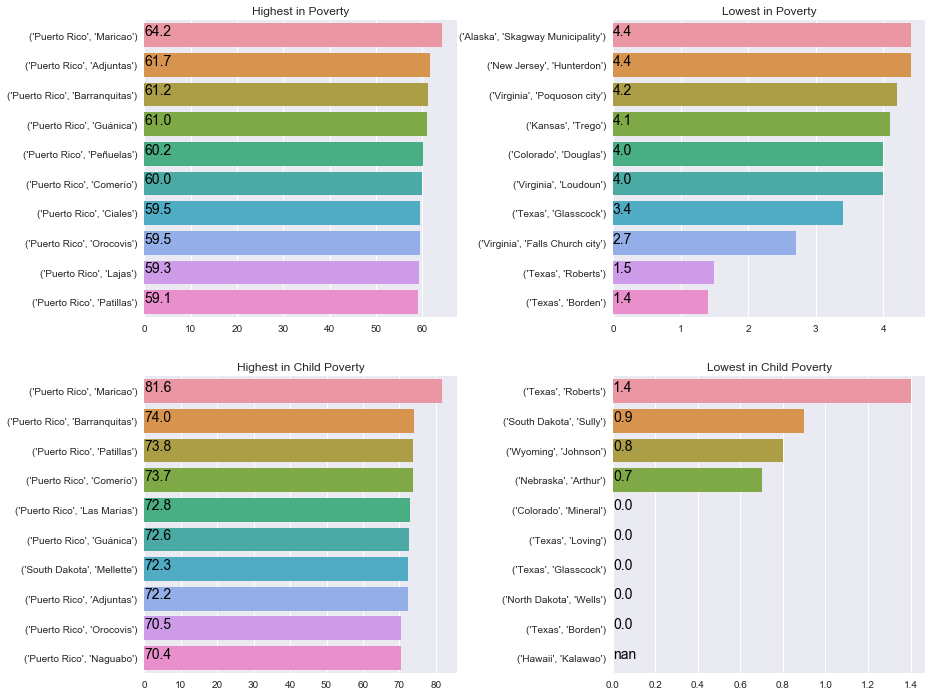

In [32]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

poverty = county.groupby(["State", "County"])["Poverty"].median().sort_values(ascending=False)
child_poverty = county.groupby(["State", "County"])["ChildPoverty"].median().sort_values(ascending=False)

pretty_bar(poverty.head(10), axarr[0][0], title="Highest in Poverty")
pretty_bar(poverty.tail(10), axarr[0][1], title="Lowest in Poverty", ylabel="")

pretty_bar(child_poverty.head(10), axarr[1][0], title="Highest in Child Poverty")
pretty_bar(child_poverty.tail(10), axarr[1][1], title="Lowest in Child Poverty", ylabel="")
del poverty, child_poverty

### Work type by County

There are several variables in the ACS estimate that can be grouped together.  I decided to group together the variables 'Professional', 'Service', 'Office', 'Construction', 'Production' all as careers.  Then I decided to put the variables 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork' all as sectors.

Some things I noticed

 - The highest fraction of people in a 'Professional' career live in Fall Church City, Virginia.  This is the same county with the highest income.
 
 - 'PublicWork' highest scorers include Kalawao - Hawaii, the smallest county with 87 people, and Lassen - California, a county with 5 national parks.
 
 - Counties with the lowest portion of Construction jobs include New York City, San Francisco, and Washington D.C.  This is a good sanity check as they are already developed and any level of developement is diluted by their large population.

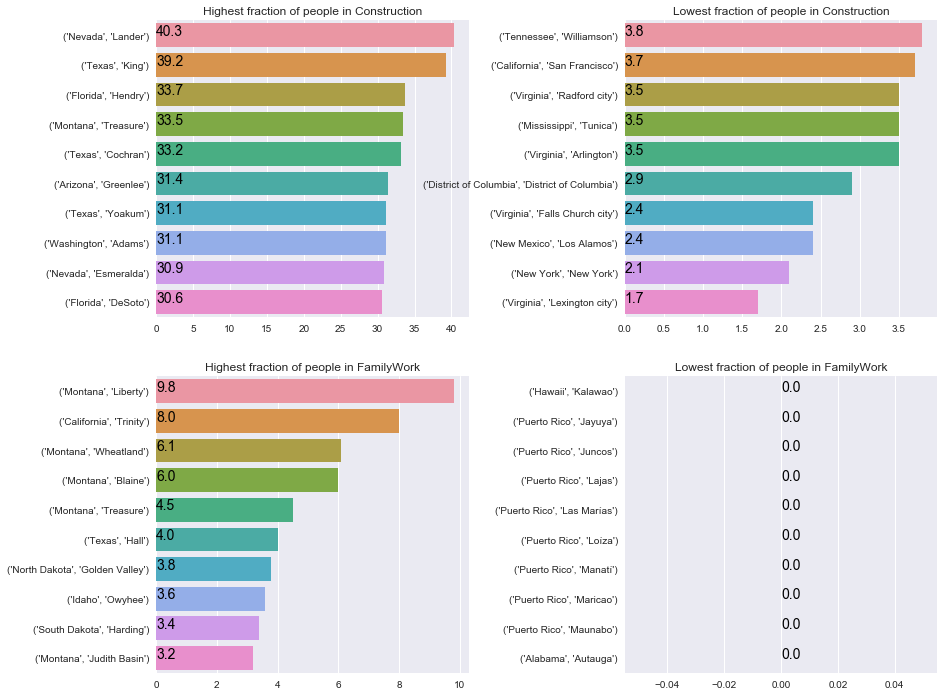

In [35]:
careers = ['Professional', 'Service', 'Office', 'Construction', 'Production']
sectors = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

################  Configure me!!  ################

career = careers[3]
sector = sectors[3]

##################################################

fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

car = county.groupby(["State", "County"])[career].median().sort_values(ascending=False)
sec = county.groupby(["State", "County"])[sector].median().sort_values(ascending=False)

pretty_bar(car.head(10), axarr[0][0], title="Highest fraction of people in {}".format(career))
pretty_bar(car.tail(10), axarr[0][1], title="Lowest fraction of people in {}".format(career), ylabel="")

pretty_bar(sec.head(10), axarr[1][0], title="Highest fraction of people in {}".format(sector))
pretty_bar(sec.tail(10), axarr[1][1], title="Lowest fraction of people in {}".format(sector), ylabel="")
del careers, sectors, career, sector

<a name="race_pop"></a>
### [^](#toc) <u>Racial Population</u>

#### Create new column: total population for each race

In [32]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    county[race + "_pop"] = (county[race] * county.TotalPop) / 100

#### Plots

I've never heard of Cook Illinois, but it has the highest Black Population and the 4th highest Hispanic Population.  Also LA seems to top the charts in terms of diversity

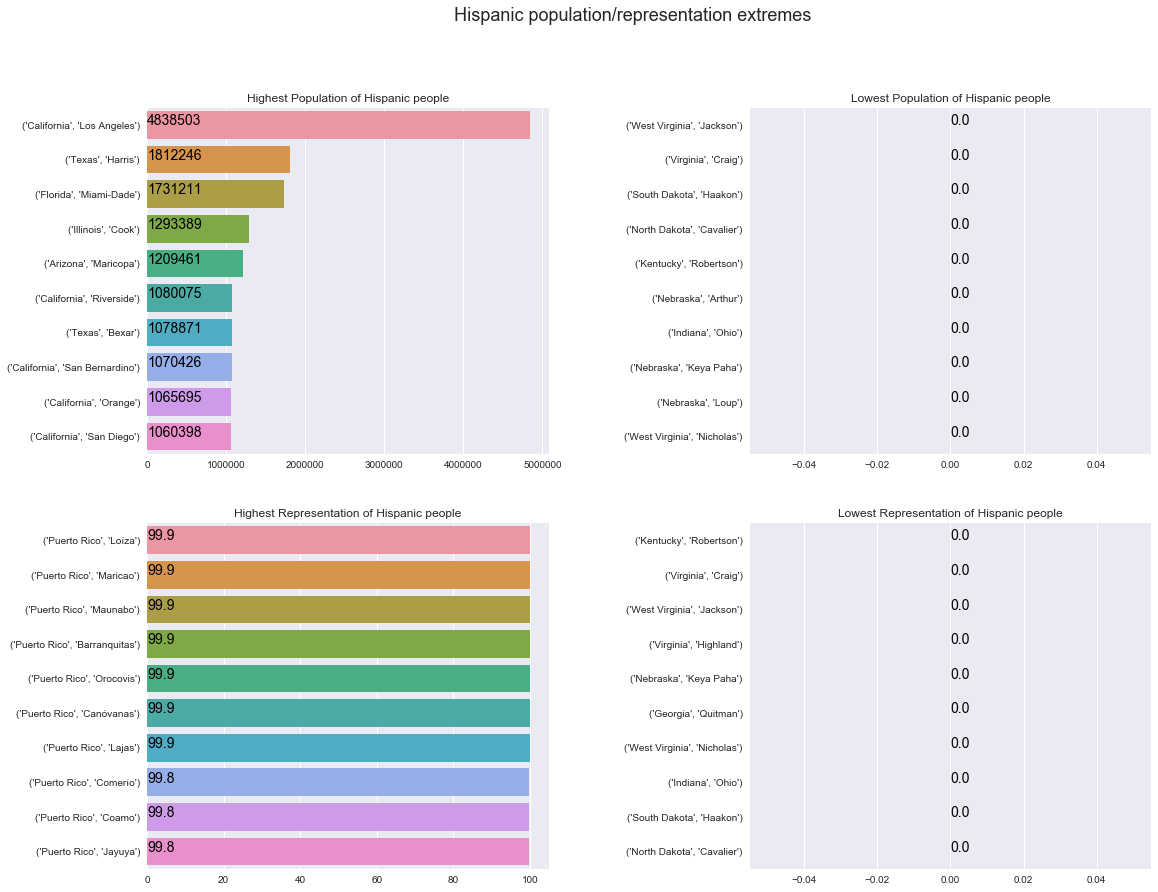

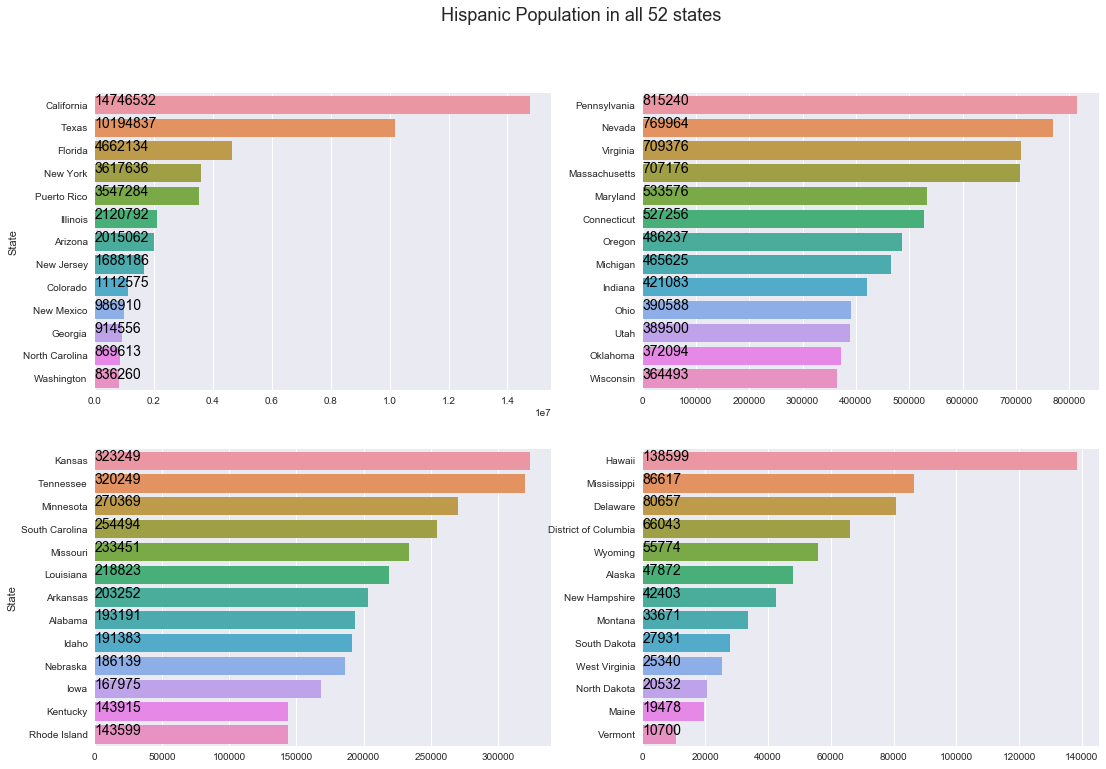

In [33]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

################  Configure me!!  ################

race = races[0]

##################################################

##### County Plots

fig, axarr = plt.subplots(2, 2, figsize=(18,14))
fig.subplots_adjust(wspace=0.5)
fig.suptitle("{} population/representation extremes".format(race), fontsize=18)

race_pops = county.groupby(["State", "County"])[race + "_pop"].sum().sort_values(ascending=False)
race_reps = county.groupby(["State", "County"])[race].median().sort_values(ascending=False)

pretty_bar(race_pops.head(10), axarr[0][0], int_text=True, title="Highest Population of {} people".format(race))
pretty_bar(race_pops.tail(10), axarr[0][1], title="Lowest Population of {} people".format(race))
pretty_bar(race_reps.head(10), axarr[1][0], title="Highest Representation of {} people".format(race))
pretty_bar(race_reps.tail(10), axarr[1][1], title="Lowest Representation of {} people".format(race))
plt.show()

##### State Plots

fig, axarr = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("{} Population in all 52 states".format(race), fontsize=18)

race_pops = county.groupby("State")[race + "_pop"].sum().sort_values(ascending=False)

pretty_bar(race_pops.head(13), ax=axarr[0][0], int_text=True)
pretty_bar(race_pops.iloc[13:26], ax=axarr[0][1], int_text=True, ylabel="")
pretty_bar(race_pops.iloc[26:39], ax=axarr[1][0], int_text=True)
pretty_bar(race_pops.tail(13), ax=axarr[1][1], int_text=True, ylabel="")
del races, race, race_pops, race_reps

#### Remove created variable: Total population for each race

In [35]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
county = county.drop([race + "_pop" for race in races], axis=1)

---

<a name="numeric"></a>
# [^](#toc) Numeric Focus


### Quick look

Just by looking at 6 columns we can see a few things:

- Growing unemployment leads to poverty
- Poverty decreases with higher income
- Poverty encourages people to carpool
- Commuties that take Transit have longer commutes

However, we don't have any hard numbers yet, we'll draw conclusions after a closer look

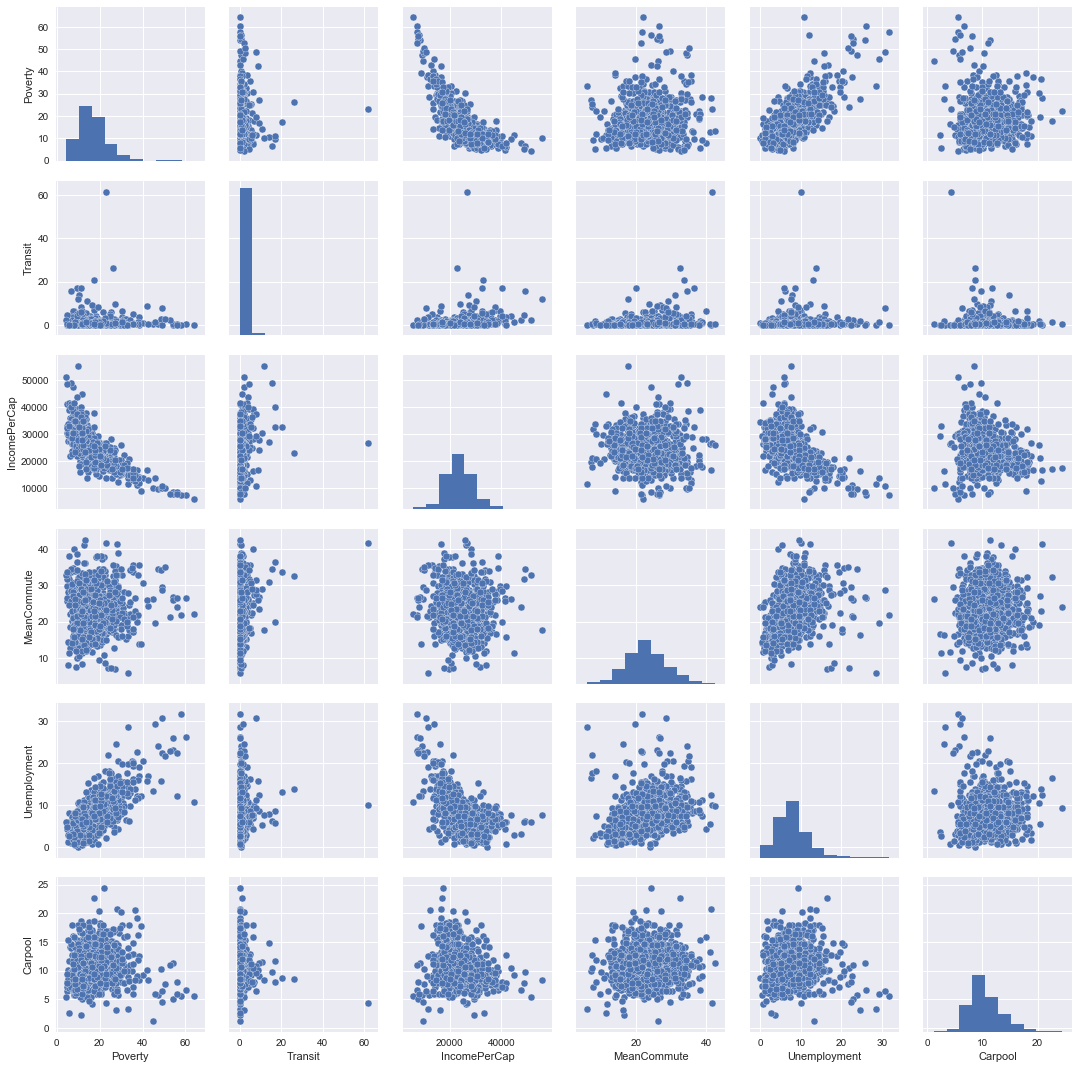

In [11]:
numeric_cols = ['Poverty', 'Transit', 'IncomePerCap', 'MeanCommute', 'Unemployment', "Carpool"]

sns.pairplot(county[numeric_cols].sample(1000))
del numeric_cols

<a name="unemply_pov"></a>
### [^](#toc) Unemployment v. Poverty

There clearly is a very strong relationship here.  Our intuition is further bolstered by p = 0 indicating low probability for the null hypothesis (the two variables are connected in some way).  In addition, the Pearson correlation coeffient is close to 1 meaning the variables have a positive relationship (larger values of Unemployment are more likely with higher values of Poverty).

This is just what we'd expect from these two variables.

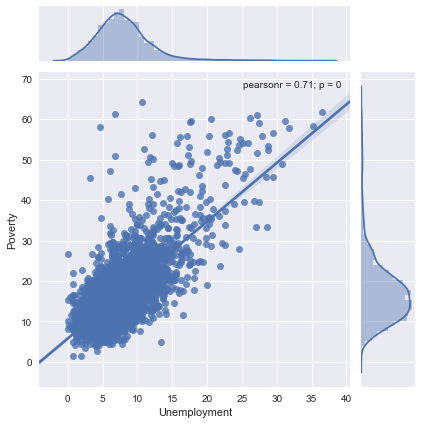

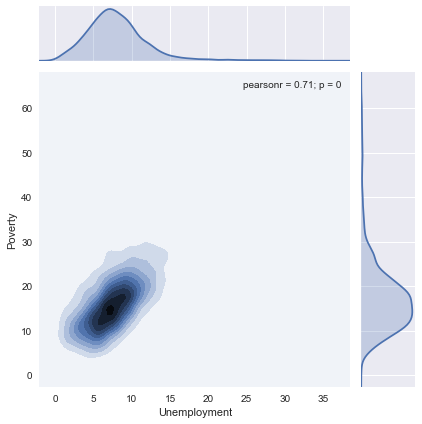

In [12]:
sns.jointplot(x='Unemployment', y='Poverty', data=county, kind="reg")
_ = sns.jointplot(x='Unemployment', y='Poverty', data=county, kind='kde')

<a name="pov_income"></a>
### [^](#toc) Poverty v. Income

Another very strong relationship and its not too surprising.  Once again p = 0 so the relationship is very likely and Pearson's R is close to -1 showing a negative relationship (low poverty tends to correlate with high income).

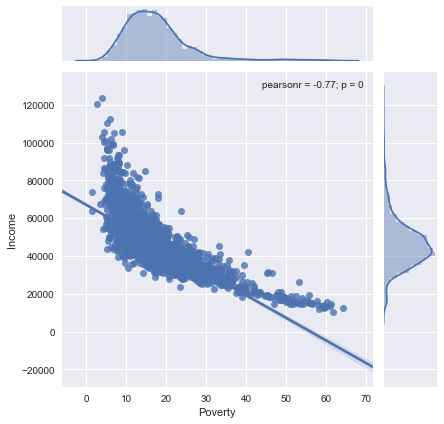

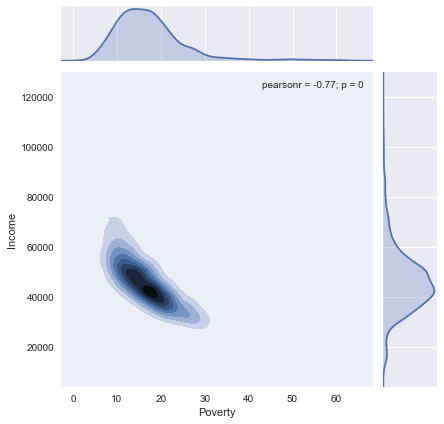

In [13]:
sns.jointplot(x='Poverty', y='Income', data=county, kind="reg")
_ = sns.jointplot(x='Poverty', y='Income', data=county, kind="kde")

<a name="pov_carpool"></a>
### [^](#toc) Poverty v. Carpool

There seems to be no evidence between these two variables.  Pearson's R is very near zero in this case making a relationship unlikely.  The plots just look like a skewered ball which isn't a good sign.

However, more data would be nice (especially for high levels of Carpooling).  The bottom graph does suggest that there might be a slight relationship between higher Poverty leading to higher Carpooling.

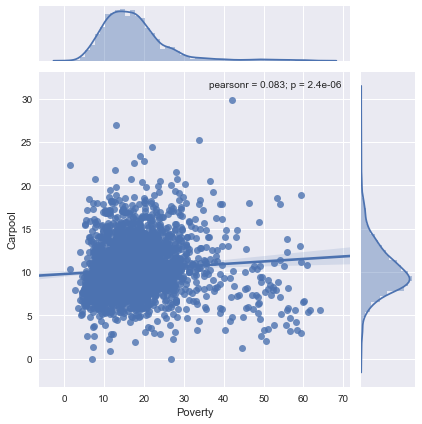

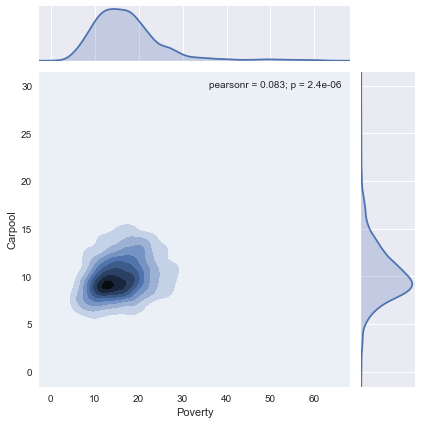

In [14]:
sns.jointplot(x='Poverty', y='Carpool', data=county, kind="reg")
_ = sns.jointplot(x='Poverty', y='Carpool', data=county, kind="kde")

<a name="commute_trans"></a>
### [^](#toc) MeanCommute v. Transit


This plot is really helpful, from the pairplot I suspected a bigger relationship than what I see here.

The lower plot (the KDE one) seems to strongly show that there is no relationship between mean commute and the amount of people that transit.  However, the top graph clearly shows that all points with high Transit values also have high Commute times.

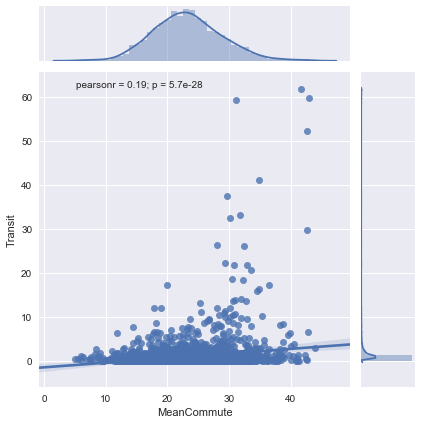

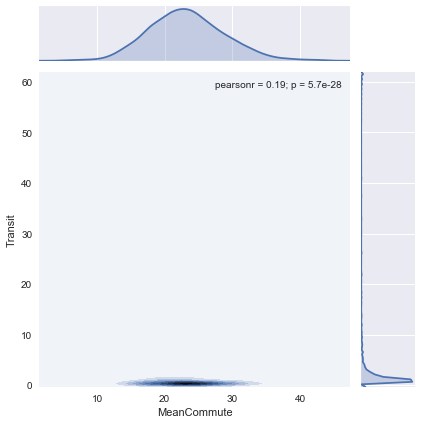

In [15]:
sns.jointplot(x='MeanCommute', y='Transit', data=county, kind="reg")
_ = sns.jointplot(x='MeanCommute', y='Transit', data=county, kind="kde")

<a name="nu_income"></a>
### [^](#toc) <u>Income</u>

#### Setup

In [40]:
high = county[county.Income > 80000]
mid  = county[(county.Income < 80000) & (county.Income > 32000)]
low  = county[county.Income < 32000]

print("Number of low income counties: {}{}{}".format(color.BOLD, len(low), color.END),
      "  Number of middle income counties: {}{}{}".format(color.BOLD, len(mid), color.END),
      "  Number of high income counties: {}{}{}".format(color.BOLD, len(high), color.END))

Number of low income counties: 287   Number of middle income counties: 2864   Number of high income counties: 68


#### Plots

The first two plots are simply to get an idea of how income is distributed.  The other two plots are a bit more exciting.

It's interesting to see that hardly anyone describes their career as 'FamilyWork'.  Notice also in the "Career Distribution" plot how the fraction of people in 'professional' careers grows with higher income while the number of people in 'Service' and 'Construction' shrink

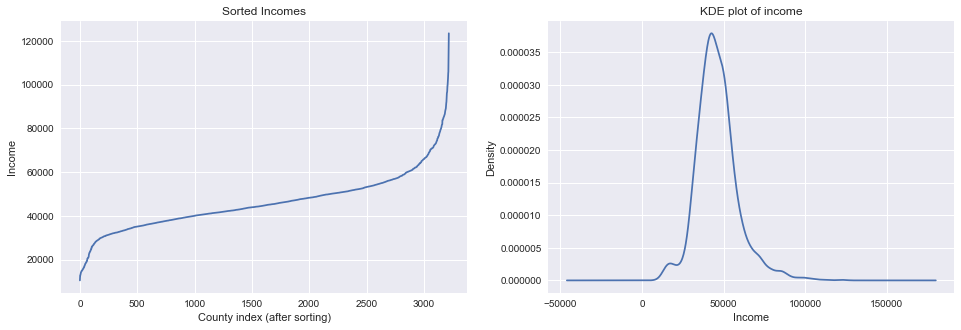

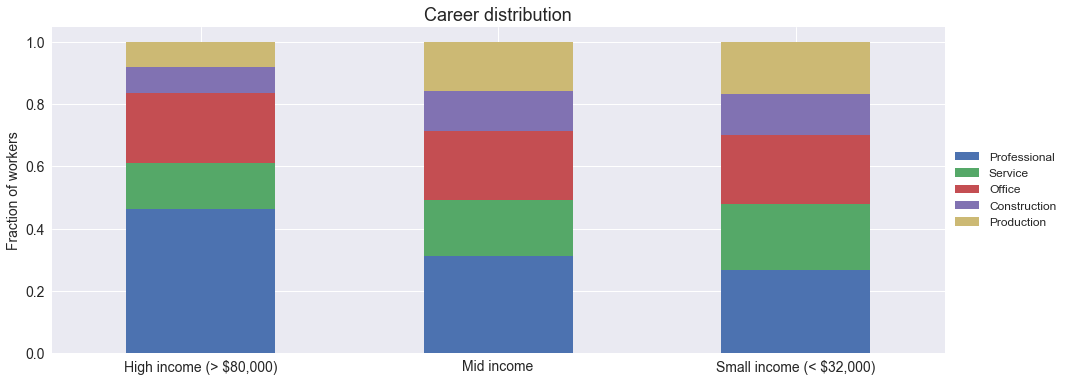

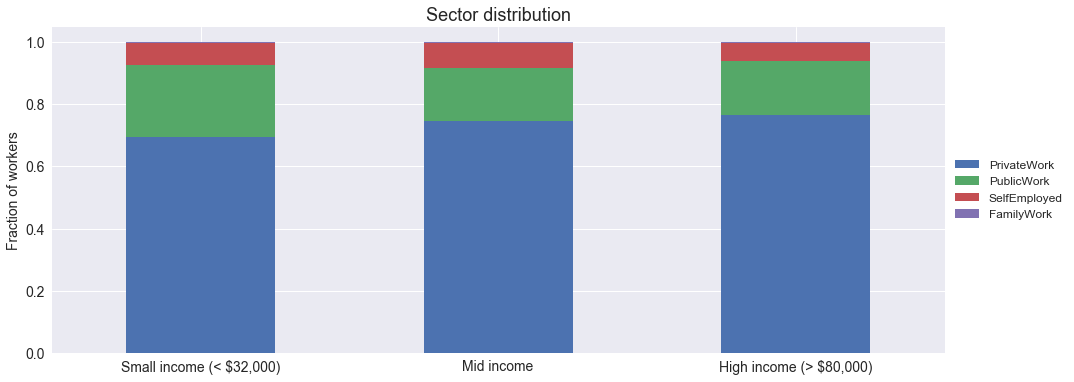

In [45]:
#########################   Income Distribution Plots   #########################

fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

income = county.groupby(["State", "County"])["Income"].median().sort_values().values
axarr[0].plot(income)
axarr[0].set(title="Sorted Incomes", xlabel="County index (after sorting)", ylabel="Income")

(
        county
            .groupby(["State", "County"])["Income"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of income", xlabel="Income")
)
plt.show()

#########################   Career Type Plots   #########################

works = [ 'Professional', 'Service', 'Office', 'Construction','Production']

pd.DataFrame({
    "Small income (< $32,000)":  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    "Mid income":  mid[works].sum(axis=0) / mid[works].sum(axis=0).sum(),
    "High income (> $80,000)": high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.title("Career distribution", fontsize=18)
plt.show()

#########################   Career Sector Plots   #########################

works = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

pd.DataFrame({
    "Small income (< $32,000)":  low[works].sum(axis=0) / low[works].sum(axis=0).sum(),
    "Mid income":  mid[works].sum(axis=0) / mid[works].sum(axis=0).sum(),
    "High income (> $80,000)": high[works].sum(axis=0) / high[works].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.title("Sector distribution", fontsize=18)
del high, mid, low, income, works

<a name="nu_comute"></a>
### [^](#toc) <u>Commute times</u>

#### Setup

In [47]:
high = county[county.MeanCommute > 32]
mid = county[(county.MeanCommute < 32) & (county.MeanCommute > 15)]
low  = county[county.MeanCommute < 15]
print("Number of short commutes: {}{}{}".format(color.BOLD, len(low), color.END),
      "  Number of average commutes: {}{}{}".format(color.BOLD, len(mid), color.END),
      "  Number of long commutes: {}{}{}".format(color.BOLD, len(high), color.END))

Number of short commutes: 186   Number of average commutes: 2803   Number of long commutes: 211


#### Plots

Similar story as the Income, the first two plots are just to get a sense of distribution.

It appears that most people who walk to work have short commutes.  In addition, the fraction of people that take Transit grows for longer Commute times.  This is a very good result as it helps solidify a relationship proposed by '[MeanCommute v. Transit](#commute_trans)' above.

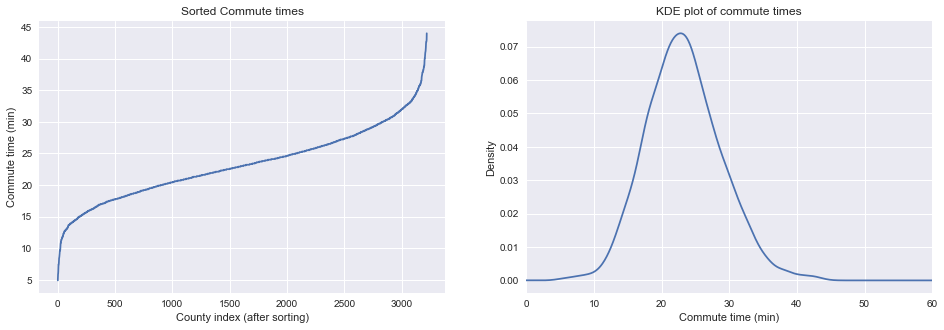

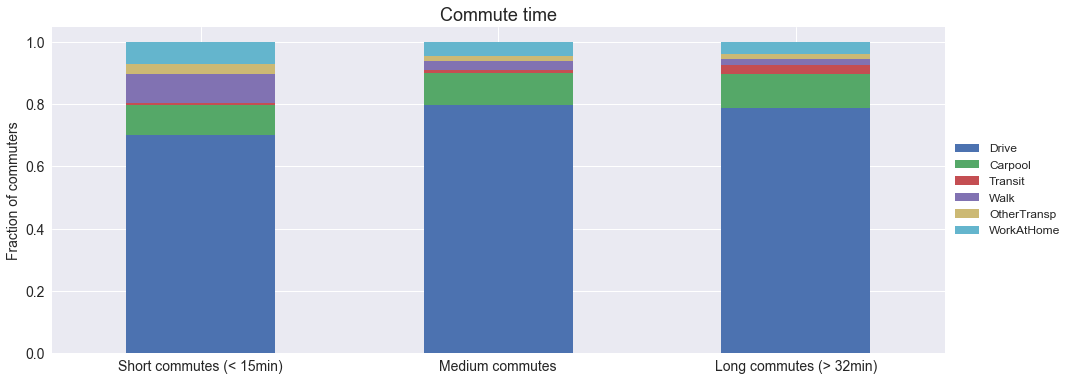

In [48]:
#########################   Commute Distribution Plots   #########################

fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

commute_times = county.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        county
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)
plt.show()

#########################   Commute Transportation Plots   #########################

trans = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', "WorkAtHome"]

pd.DataFrame({
    "Short commutes (< 15min)":  low[trans].sum(axis=0) / low[trans].sum(axis=0).sum(),
    "Medium commutes":  mid[trans].sum(axis=0) / mid[trans].sum(axis=0).sum(),
    "Long commutes (> 32min)": high[trans].sum(axis=0) / high[trans].sum(axis=0).sum()
}).transpose().sort_index(ascending=False).plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of commuters", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.title("Commute time", fontsize=18)
del high, mid, low, commute_times, trans

<a name="fun"></a>
# [^](#toc) <u>Focus on Fun!</u>

### Longest and Shortest County names

Not much too say about this first script, hopefully this as fun for you too!

In [37]:
longest_county_name_on_census_dataset_index = np.argmax(county.County.map(len))
s_i = np.argmin(county.County.map(len))

county[(county.index == longest_county_name_on_census_dataset_index) | (county.index == s_i)]

CensusId    State                             County  TotalPop    Men  \
40      1081  Alabama                                Lee    150982  74277   
88      2198   Alaska  Prince of Wales-Hyder Census Area      6376   3468   

    Women  Hispanic  White  Black  Native  Asian  Pacific  Citizen   Income  \
40  76705       3.7   68.2   23.0     0.1    3.3      0.0   112580  44570.0   
88   2908       3.2   46.0    0.2    40.3    0.8      0.3     4764  48523.0   

    IncomeErr  IncomePerCap  IncomePerCapErr  Poverty  ChildPoverty  \
40     2152.0         24356              772     23.8          24.0   
88     2745.0         25205             1582     14.6          20.2   

    Professional  Service  Office  Construction  Production  Drive  Carpool  \
40          39.7     16.1    22.9           8.3        13.0   84.6      8.0   
88          27.0     17.3    19.1          20.0        16.6   51.6     15.3   

    Transit  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
40      1.0   2.2          1.0         3.1         21.7     68614   
88      0.9  20.3          7.3         4.6         14.0      2819   

    PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  \
40         75.5        20.3           4.1         0.1           7.3   
88         50.4        37.7          11.8         0.1          13.9   

    Men to women  
40      0.968346  
88      1.192572

### Largest 'Income' and 'IncomePerCap' errors

I wonder if this indicates high income inequality

In [21]:
max_income_err  = county[county.IncomeErr == max(county.IncomeErr)]
max_income_place = (max_income_err.County + ", " + max_income_err.State).sum()

max_per_cap_err = county[county.IncomePerCapErr == max(county.IncomePerCapErr)]
max_per_cap_place = (max_per_cap_err.County + ", " + max_per_cap_err.State).sum()

print("The County with the biggest income error is: {}{}{}".format(color.BOLD, max_income_place, color.END),
      "with an error of:", color.BOLD, "$" + str(max_income_err.IncomeErr.median()), color.END)
print("The County with the biggest income per cap error is: {}{}{}".format(color.BOLD, max_per_cap_place, color.END),
      "with an error of:", color.BOLD, "$" + str(max_per_cap_err.IncomeErr.median()), color.END)
del max_income_err, max_income_place, max_per_cap_err, max_per_cap_place

The County with the biggest income error is: King, Texas with an error of:  $21355.0 
The County with the biggest income per cap error is: Borden, Texas with an error of:  $8208.0 


<a name="fun_gender"></a>
### [^](#toc) <u>Gender imbalance</u>

#### General comments

The demographics I see on Wikipedia do not match what I see here.  Norton, Virginia says there are 0.818 men to every women ([link](https://en.wikipedia.org/wiki/Norton,_Virginia)) not 0.682 men; Forest, Pennslyvannia says there are 1.112 men to every women ([link](https://en.wikipedia.org/wiki/Forest_County,_Pennsylvania)) not 2.73 men; Sussex, Virginia says there are 1.351 men to every women ([link](https://en.wikipedia.org/wiki/Sussex_County,_Virginia)) not 2.177.

This can be the result of two things:

(1) All of these counties are on the lower side of population (around 5,000 people), so small flucuations in gender populations can account for some of these results.  In addition the ACS only samples 1-in-480 households a month.  The low sampling rate in addition to the small populations could result in high errors.

(2) However it could also be the result of single gender prisons.  This would explain both why the demographic discrepancy on Wikipedia and why the population would be so low.

#### High Men to Women

Forest - Pennslyvania ([link](https://en.wikipedia.org/wiki/State_Correctional_Institution_%E2%80%93_Forest)), Bent - Colorado ([link](http://bentcounty.org/2010/11/bent-county-correctional-facility-cca/)), and Sussex - Virginia ([prison 1](https://en.wikipedia.org/wiki/Sussex_I_State_Prison)) ([prison 2](https://en.wikipedia.org/wiki/Sussex_II_State_Prison)) all have prisons within the county so maybe I'm onto something.  Also, I have been able to confirm that one of Sussex's prisons and Forest's prison are all male.

#### Low Men to Women

Pulaski, Georgia contains an all women prison ([link](http://www.dcor.state.ga.us/GDC/FacilityMap/html/S_50000214.html)).

In addition to women I expect any population on the older side will skew toward more women since women tend to live longer than men.

#### Fun facts!

- Chillicothe, county seat of Livingston - Missouri, was the first place to introduce commericial bread slicing.  And has since led the standard in "best thing"
- The Lorton, Virginia Wikipedia page has a section for [famous prisoners](https://en.wikipedia.org/wiki/Lorton_Reformatory)

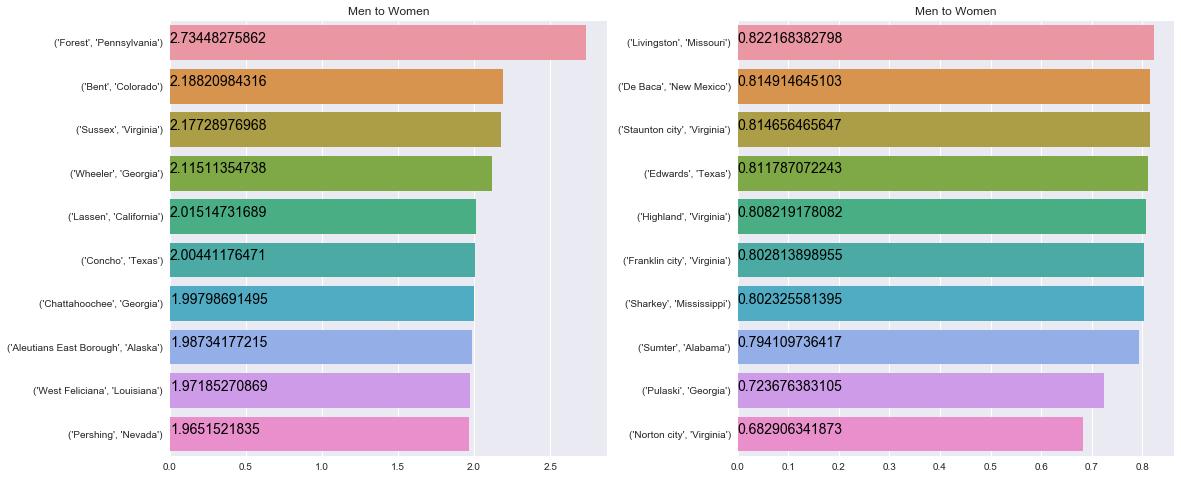

In [22]:
county["Men to women"] = county.Men / county.Women
men_to_women = county.groupby(["County", "State"])["Men to women"].median().sort_values(ascending=False)

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(wspace=0.3)

pretty_bar(men_to_women.head(10), axarr[0], title="Men to Women")
pretty_bar(men_to_women.tail(10), axarr[1], title="Men to Women")
del men_to_women

<a name="fun_selected"></a>
## [^](#toc) <u>Selected Counties</u>

Finally to end this data exploration I included a chance to compare places you've lived!  I've been in the Bay Area most of my life so I choose some counties that I was interested to compare.

In [38]:
################  Configure me!!  ################

state = "California"

##################################################

print("{}{}NOTE{}{}: This is just to help you explore different counties{}"
      .format(color.UNDERLINE, color.BOLD, color.END, color.UNDERLINE, color.END))

county[county.State == state].County.unique()

NOTE: This is just to help you explore different counties


array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta',
       'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

#### Setup

Change the configure me here to look at any county you desire!

In [24]:
################  Configure me!!  ################

counties = [("Santa Clara", "California"),   ("San Diego", "California"),
            ("Monterey", "California"),      ("Alameda", "California"),
            ("San Francisco", "California"), ("Contra Costa", "California"),
            ("Los Angeles", "California"),   ("Fresno", "California")]

##################################################

commute, income, income_percap, men, women = ([],[],[],[],[])
hispanic, white, black, native, asian, pacific = ([],[],[],[],[],[])

def total_race(df, race):
    total_pop = df[race] * df.TotalPop
    frac_pop = (total_pop / 100).sum()
    return int(frac_pop)
    
for c, s in counties:
    curr_county = county[(county.County == c) & (county.State == s)]

    commute.append(curr_county.MeanCommute.median())
    men.append(   int(curr_county.Men.median())   )
    women.append( int(curr_county.Women.median()) )
    
    ### NOTE: These demographics are
    hispanic.append( total_race(curr_county, "Hispanic") )
    white.append(    total_race(curr_county, "White")    )
    black.append(    total_race(curr_county, "Black")    )
    native.append(   total_race(curr_county, "Native")   )
    asian.append(    total_race(curr_county, "Asian")    )
    pacific.append(  total_race(curr_county, "Pacific")  )
    income.append(curr_county.Income.median())
    income_percap.append(curr_county.IncomePerCap.median())

counties = pd.DataFrame({
                "Women": women, "Men": men, "Mean Commute": commute,
                "Hispanic": hispanic, "White": white, "Black": black,
                "Native": native, "Asian": asian, "Pacific": pacific,
                "IncomePerCap": income_percap, "Income": income
            }, index=counties)

counties["Men to women"] = counties.Men / counties.Women
del commute, income, income_percap, men, women, hispanic, white, black, native, asian, pacific
counties.head()

Asian   Black  Hispanic   Income  IncomePerCap  \
(Santa Clara, California)    625829   44835    496927  96310.0       43880.0   
(San Diego, California)      360986  151485   1060398  64309.0       31266.0   
(Monterey, California)        25278   11139    243782  58783.0       24994.0   
(Alameda, California)        435870  179103    358206  75619.0       37285.0   
(San Francisco, California)  281655   44560    128636  81294.0       52220.0   

                             Mean Commute      Men  Native  Pacific    White  \
(Santa Clara, California)            26.3   939004    3736     5604   627698   
(San Diego, California)              25.0  1618945   12892    12892  1514855   
(Monterey, California)               22.3   219299    1285     2142   134958   
(Alameda, California)                30.7   776699    4754    12679   523044   
(San Francisco, California)          31.7   427909    1681     3363   346394   

                               Women  Men to women  
(Santa Clara, California)     929145      1.010611  
(San Diego, California)      1604151      1.009222  
(Monterey, California)        209142      1.048565  
(Alameda, California)         808284      0.960923  
(San Francisco, California)   412854      1.036466

#### Plots

A few things to note

- Contra Costa has cheaper housing than Alameda, SF, so it makes sense that it's commute is long (live in Contra Costra, commute to SF or Alameda)
- I was surprised to learn LA has a shorter commute than SF
- I included the gender ratios because at these population levels they should be centered at 1 (see [Appendix A](#app_a) for more analysis)
- California appears to have a fair amount of racial diversity
- SF population is a lot smaller than I expected
- Income and IncomePerCap isn't surprising especially regarding SF, Santa Clara, and Fresno

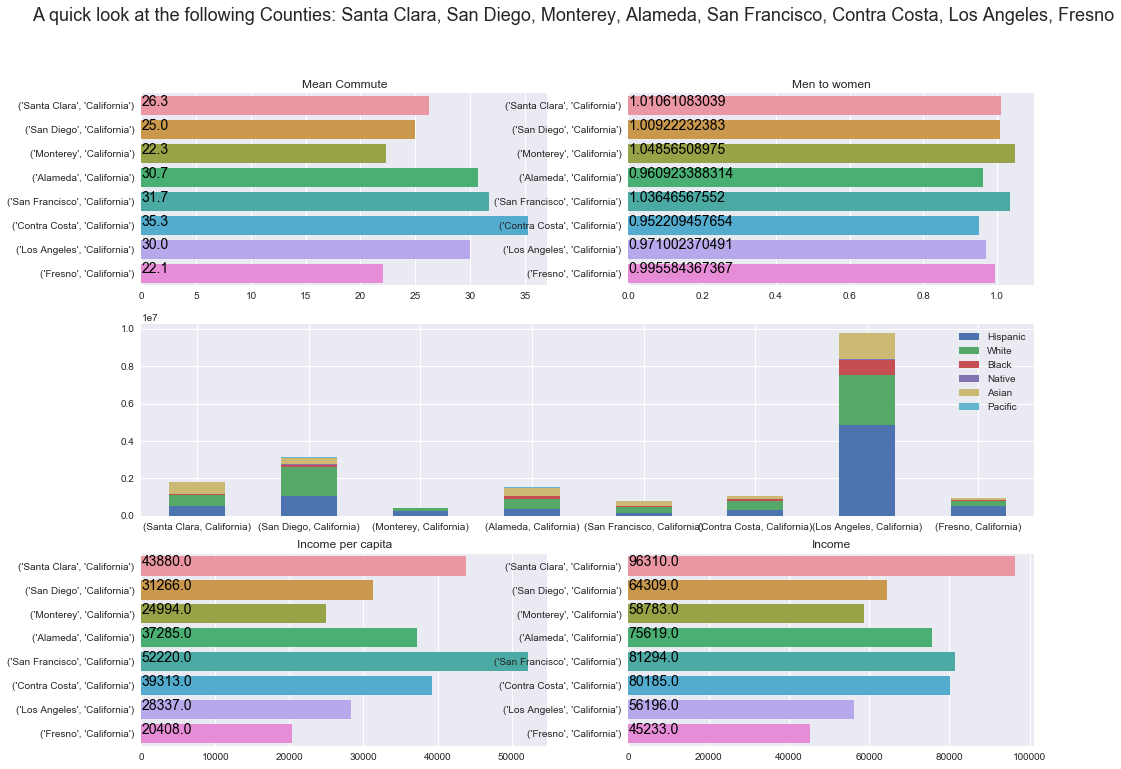

In [25]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))

plt.suptitle("A quick look at the following Counties: {}".format(", ".join([c for c,s in counties.index])), fontsize=18)

pretty_bar(counties["Mean Commute"], ax1, title="Mean Commute")
pretty_bar(counties["Men to women"], ax2, title="Men to women")

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
counties[races].plot(kind="bar", stacked=True, ax=ax3, rot=0)

pretty_bar(counties["IncomePerCap"], ax4, title="Income per capita")
pretty_bar(counties["Income"], ax5, title="Income")
del races

---

<a name="appendix"></a>
# [^](#toc) <u>Appendix</u>

<a name="app_a"></a>
### [^](#toc) <u>A: Gender Imbalance</u>

#### Background

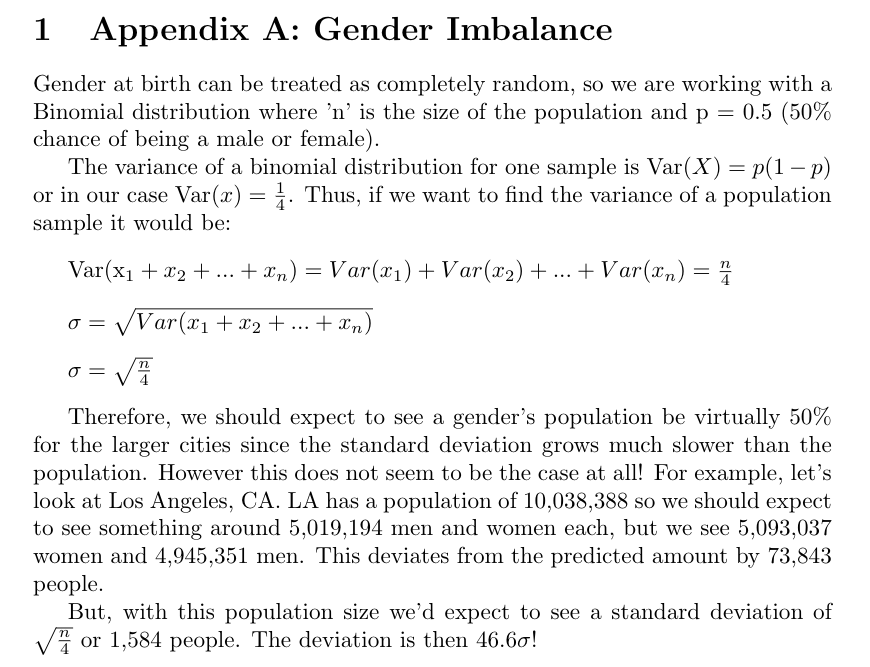

In [233]:
Image(filename='photos/app_a.png', width=600, height=300)

#### Try for yourself!

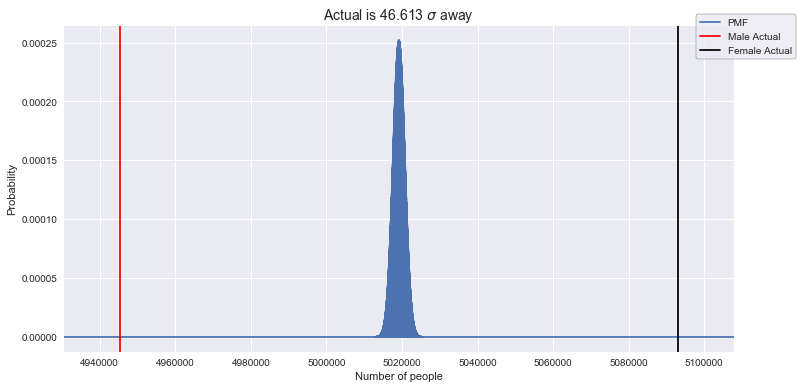

In [224]:
# Statistics imports
import scipy, scipy.stats

################  Configure me!!  ################

selected_county = ("Los Angeles", "California")

##################################################

# Gets the selected county from the data
selected_county = county[(county.State == selected_county[1]) & (county.County == selected_county[0])]

### Gets the total population and the number of men
n = selected_county.TotalPop.sum()
men = selected_county.Men.median()
women = selected_county.Women.median()

# Calculates the number of standard deivations
distance = abs((n / 2) - men)
sigma = distance / np.sqrt(n / 4)

# Get the probability distribution for a population this size
x = np.linspace(.4*n, .6*n, n+1)
pmf = scipy.stats.binom.pmf(x, n, 0.5)

### Plots the probability distribution and the actual value
plt.figure(figsize=(12, 6))
plt.plot(x, pmf, label="PMF")
plt.axvline(men, color="red", label="Male Actual")
plt.axvline(women, color="k", label="Female Actual")

### Limits the plot to the only interesting sectiton
llim, rlim = n/2 - 1.2*distance, n/2 + 1.2*distance
plt.xlim(llim, rlim)

# Labels the plot
plt.title("Actual is {} $\sigma$ away".format(round(sigma, 3)), fontsize=14)
plt.xlabel("Number of people")
plt.ylabel("Probability")
_ = plt.legend(frameon=True, bbox_to_anchor=(1.1, 1.05)).get_frame().set_edgecolor('black')

# Thank you for making it so far!

This is my first kernel on Kaggle so please let, me know anything I did horribly wrong (or something you liked).

<a name="resources"></a>
# [^](#toc) <u>Resources</u>

- The American Community Survey website ([link](https://www.census.gov/programs-surveys/acs/))
- The American Community Survey Information Guide ([link](https://www.census.gov/programs-surveys/acs/about/information-guide.html))
- Here is the dataset for this project ([link](https://www.kaggle.com/muonneutrino/us-census-demographic-data)).  Thank you again to [MuonNeutrino](https://www.kaggle.com/muonneutrino) and [Kaggle](https://www.kaggle.com/)
- PBS Newshour has a nice explanation of the Census along with concerns for the 2020 Census ([link](https://www.youtube.com/watch?v=1Y6PI3EtA54))


<a name="criticism"></a>
# [^](#toc) <u>ACS Criticism</u>

- To my fellow Americans: take a guess who would be first! ([link](https://www.lewrockwell.com/2004/07/ron-paul/its-none-of-your-business/))

- I'm worried how often people refuse to answer questions and how that affects data quality ([see example](https://www.youtube.com/watch?v=bYwdOxOBwgM)).

- The estimated budget for 2019 is $3.8 billion ([link to census budget](https://www2.census.gov/about/budget/2019-Budget-Infographic-Bureau-Summary.pdf)).

- Take a look at the [sample questionnaire](https://www2.census.gov/programs-surveys/acs/methodology/questionnaires/2018/quest18.pdf) from 2018 and decide if the questons are too invasive.

<a name="further"></a>
# [^](#toc) <u>Further Work</u>

- Have country visualizations using the Bokeh library (Plotly is also good)
- Use less Wikipedia in links
- Explore MeanCommute as a function of county population
- Look at US population data over time
- Analysis of really old Census data (from 1800s)